# **Exploratory Data Analysis**

### Importing the libraries

In [30]:
# to handle datasets
import pandas as pd
import numpy as np

# for plotting
import matplotlib.pyplot as plt
import seaborn as sns

#for replacing null values 
from sklearn.impute import SimpleImputer

### Uploading the data

In [31]:
# load dataset and read
data_url='https://drive.google.com/file/d/1ZPZUAlXFEA33Mcm_wgOQDmujmG39j7zQ/view?usp=sharing'
data_url='https://drive.google.com/uc?id=' + data_url.split('/')[-2]
data = pd.read_csv(data_url)

<ipython-input-31-aa2795821a64>:4: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(data_url)


### Exploring the dataset

In [32]:
# rows and columns of the data
print(data.shape)

# visualise the dataset
data.head(10)

(100000, 28)


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
5,0x1607,CUS_0xd40,June,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172331195294,!@9#%8,340.4792117872438,Good
6,0x1608,CUS_0xd40,July,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good
7,0x1609,CUS_0xd40,August,NaN,23,#F%$D@*&8,Scientist,19114.12,1824.843333,3,...,Good,809.98,23.933795,NaN,No,49.574949,24.785216509052056,High_spent_Medium_value_payments,358.12416760938714,Standard
8,0x160e,CUS_0x21b1,January,Rick Rothackerj,28_,004-07-5839,_______,34847.84,3037.986667,2,...,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825168246,Low_spent_Small_value_payments,470.69062692529184,Standard
9,0x160f,CUS_0x21b1,February,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,...,Good,605.03,38.550848,26 Years and 8 Months,No,18.816215,40.39123782853101,High_spent_Large_value_payments,484.5912142650067,Good


In [33]:
#list the columns
data.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [34]:
#dropping columns not contributing to predictive power of future model
#dropping Type_of_loan because of poor format
data.drop(columns=['ID', 'Customer_ID', 'Month', 'Name', 'SSN', 'Type_of_Loan'], inplace=True)

In [35]:
data.shape

(100000, 22)

In [36]:
data.dtypes

Age                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                 object
dtype: object

In [37]:
# changing type of numerical columns
for col in ['Age', 'Annual_Income', 'Num_of_Loan', 'Num_of_Delayed_Payment',  'Changed_Credit_Limit', 'Outstanding_Debt', 'Amount_invested_monthly', 'Monthly_Balance']:
  data[col] = pd.to_numeric(data[col], errors = 'coerce')

In [38]:
# if there are negative values present in the mentioned columns set them to null
for col in ['Age', 'Annual_Income', 'Num_of_Loan', 'Num_of_Delayed_Payment', 'Outstanding_Debt', 'Amount_invested_monthly']:
  for i in range (len(data[col])):
    if data[col][i] <= 0:
      data[col][i] = None

<ipython-input-38-91a274342c76>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col][i] = None


In [39]:
# 'Credit_History_Age' is a separate case
null_list = data['Credit_History_Age'].isnull()

for i in range (len(data['Credit_History_Age'])):
  if null_list[i] == False:
    a = data['Credit_History_Age'][i]
    a = a.split(" ")
    data['Credit_History_Age'][i] = round(int(a[0]) + int(a[3])/12, 2)
data["Credit_History_Age"] = pd.to_numeric(data["Credit_History_Age"], errors = 'coerce')

<ipython-input-39-129bfdfa5522>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Credit_History_Age'][i] = round(int(a[0]) + int(a[3])/12, 2)


In [40]:
data.dtypes

Age                         float64
Occupation                   object
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                 float64
Delay_from_due_date           int64
Num_of_Delayed_Payment      float64
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Credit_History_Age          float64
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour            object
Monthly_Balance             float64
Credit_Score                 object
dtype: object

In [41]:
#ctg are categorical variables, num are numerical
ctg = [col for col in data.columns if type(data[col][0]) == str]
num = [col for col in data.columns if col not in ctg]
num, ctg

(['Age',
  'Annual_Income',
  'Monthly_Inhand_Salary',
  'Num_Bank_Accounts',
  'Num_Credit_Card',
  'Interest_Rate',
  'Num_of_Loan',
  'Delay_from_due_date',
  'Num_of_Delayed_Payment',
  'Changed_Credit_Limit',
  'Num_Credit_Inquiries',
  'Outstanding_Debt',
  'Credit_Utilization_Ratio',
  'Credit_History_Age',
  'Total_EMI_per_month',
  'Amount_invested_monthly',
  'Monthly_Balance'],
 ['Occupation',
  'Credit_Mix',
  'Payment_of_Min_Amount',
  'Payment_Behaviour',
  'Credit_Score'])

In [42]:
data.describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,94175.000000,9.302000e+04,84998.000000,100000.000000,100000.00000,100000.000000,80959.000000,100000.000000,88064.000000,97909.000000,98035.000000,98991.000000,100000.000000,90970.000000,100000.000000,91047.000000,98791.000000
mean,116.682187,1.785790e+05,4194.170850,17.091280,22.47443,72.466040,8.057535,21.068780,31.816452,10.389025,27.754251,1426.503700,32.285173,18.433032,1403.118217,195.902413,402.551258
std,690.079845,1.442878e+06,3183.686167,117.404834,129.05741,466.422621,63.715344,14.860104,229.705373,6.789496,193.177339,1155.045753,5.116875,8.311783,8306.041270,199.571593,213.925499
min,14.000000,7.005930e+03,303.645417,-1.000000,0.00000,1.000000,1.000000,-5.000000,1.000000,-6.490000,0.000000,0.230000,20.000000,0.080000,0.000000,10.010194,0.007760
25%,25.000000,1.943560e+04,1625.568229,3.000000,4.00000,8.000000,2.000000,10.000000,9.000000,5.320000,3.000000,566.080000,28.052567,12.000000,30.306660,72.505016,270.106630
50%,33.000000,3.755074e+04,3093.745000,6.000000,5.00000,13.000000,4.000000,18.000000,14.000000,9.400000,6.000000,1166.370000,32.305784,18.250000,69.249473,129.220009,336.731225
75%,42.000000,7.284338e+04,5957.448333,7.000000,7.00000,20.000000,6.000000,28.000000,18.000000,14.870000,9.000000,1948.200000,36.496663,25.170000,161.224249,237.128026,470.262938
max,8698.000000,2.419806e+07,15204.633333,1798.000000,1499.00000,5797.000000,1496.000000,67.000000,4397.000000,36.970000,2597.000000,4998.070000,50.000000,33.670000,82331.000000,1977.326102,1602.040519


In [43]:
for col in ctg:
  print(col, "\n", data[col].unique())

Occupation 
 ['Scientist' '_______' 'Teacher' 'Engineer' 'Entrepreneur' 'Developer'
 'Lawyer' 'Media_Manager' 'Doctor' 'Journalist' 'Manager' 'Accountant'
 'Musician' 'Mechanic' 'Writer' 'Architect']
Credit_Mix 
 ['_' 'Good' 'Standard' 'Bad']
Payment_of_Min_Amount 
 ['No' 'NM' 'Yes']
Payment_Behaviour 
 ['High_spent_Small_value_payments' 'Low_spent_Large_value_payments'
 'Low_spent_Medium_value_payments' 'Low_spent_Small_value_payments'
 'High_spent_Medium_value_payments' '!@9#%8'
 'High_spent_Large_value_payments']
Credit_Score 
 ['Good' 'Standard' 'Poor']


In [44]:
#replace all signs that do not make sense with a null values

data["Occupation"].replace('_______', inplace = True)


In [45]:
data["Credit_Mix"].replace('_', None, inplace = True)

In [46]:
data["Payment_Behaviour"].replace('!@9#%8', inplace = True)

In [47]:
#portions of nan values in each column
data.isnull().sum()/len(data)

Age                         0.05825
Occupation                  0.00000
Annual_Income               0.06980
Monthly_Inhand_Salary       0.15002
Num_Bank_Accounts           0.00000
Num_Credit_Card             0.00000
Interest_Rate               0.00000
Num_of_Loan                 0.19041
Delay_from_due_date         0.00000
Num_of_Delayed_Payment      0.11936
Changed_Credit_Limit        0.02091
Num_Credit_Inquiries        0.01965
Credit_Mix                  0.20195
Outstanding_Debt            0.01009
Credit_Utilization_Ratio    0.00000
Credit_History_Age          0.09030
Payment_of_Min_Amount       0.00000
Total_EMI_per_month         0.00000
Amount_invested_monthly     0.08953
Payment_Behaviour           0.00000
Monthly_Balance             0.01209
Credit_Score                0.00000
dtype: float64

# **Taget variables**

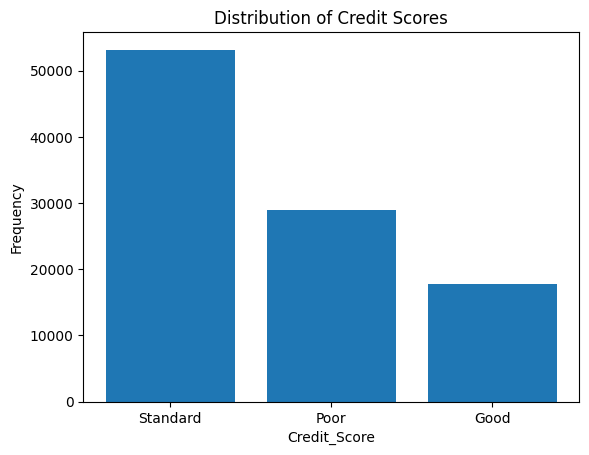

In [48]:
#barplot to evaluate target distribution

freq = data['Credit_Score'].value_counts()

# Create bar plot
plt.bar(freq.index, freq.values)

# Add axis labels and title
plt.xlabel('Credit_Score')
plt.ylabel('Frequency')
plt.title('Distribution of Credit Scores')

# Show plot
plt.show()

# **Encode categorical values**

In [49]:
from sklearn.preprocessing import LabelEncoder as le  

In [50]:
Occupation_le = le()
Credit_Mix_le = le()
Credit_History_Age_le = le()
Payment_of_Min_Amount_le = le()
Payment_Behaviour_le = le()
Credit_Score_le = le()

In [51]:
data['Occupation'] = Occupation_le.fit_transform(data['Occupation'])
data['Credit_Mix'] = Credit_Mix_le.fit_transform(data['Credit_Mix'])
data['Payment_of_Min_Amount'] = Payment_of_Min_Amount_le.fit_transform(data['Payment_of_Min_Amount'])
data['Payment_Behaviour'] = Payment_Behaviour_le.fit_transform(data['Payment_Behaviour'])
data['Credit_Score'] = Credit_Score_le.fit_transform(data['Credit_Score'])

In [52]:
#Replace null values in categorical variables
imputer = SimpleImputer(strategy='most_frequent')
for col in ctg:
  data[col] = imputer.fit_transform(data[[col]])

In [53]:
#Replace null values in numerical variables
imputer = SimpleImputer(strategy='mean')
for col in num:
  data[col] = imputer.fit_transform(data[[col]])


In [54]:
#calculate the percentage of missing values for each column
data.isnull().sum()/len(data)

Age                         0.0
Occupation                  0.0
Annual_Income               0.0
Monthly_Inhand_Salary       0.0
Num_Bank_Accounts           0.0
Num_Credit_Card             0.0
Interest_Rate               0.0
Num_of_Loan                 0.0
Delay_from_due_date         0.0
Num_of_Delayed_Payment      0.0
Changed_Credit_Limit        0.0
Num_Credit_Inquiries        0.0
Credit_Mix                  0.0
Outstanding_Debt            0.0
Credit_Utilization_Ratio    0.0
Credit_History_Age          0.0
Payment_of_Min_Amount       0.0
Total_EMI_per_month         0.0
Amount_invested_monthly     0.0
Payment_Behaviour           0.0
Monthly_Balance             0.0
Credit_Score                0.0
dtype: float64

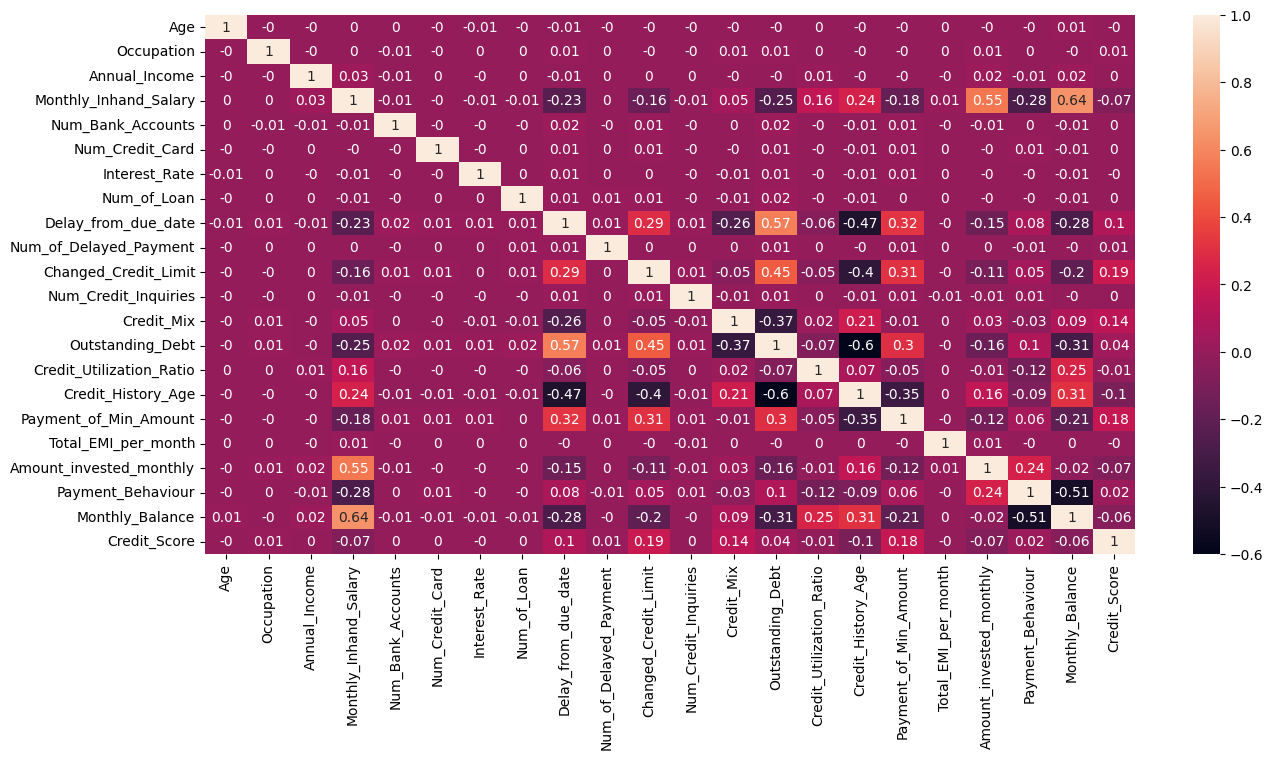

In [55]:
# Create a correlation matrix of the numerical variables
corr_matrix = round(data.corr(),2)
plt.figure(figsize=(15,7))
sns.heatmap(corr_matrix, annot=True)
plt.show()

# **Handle Outliers**

In [56]:
#select columns with numeric data
numCols = data.select_dtypes([np.number]).columns

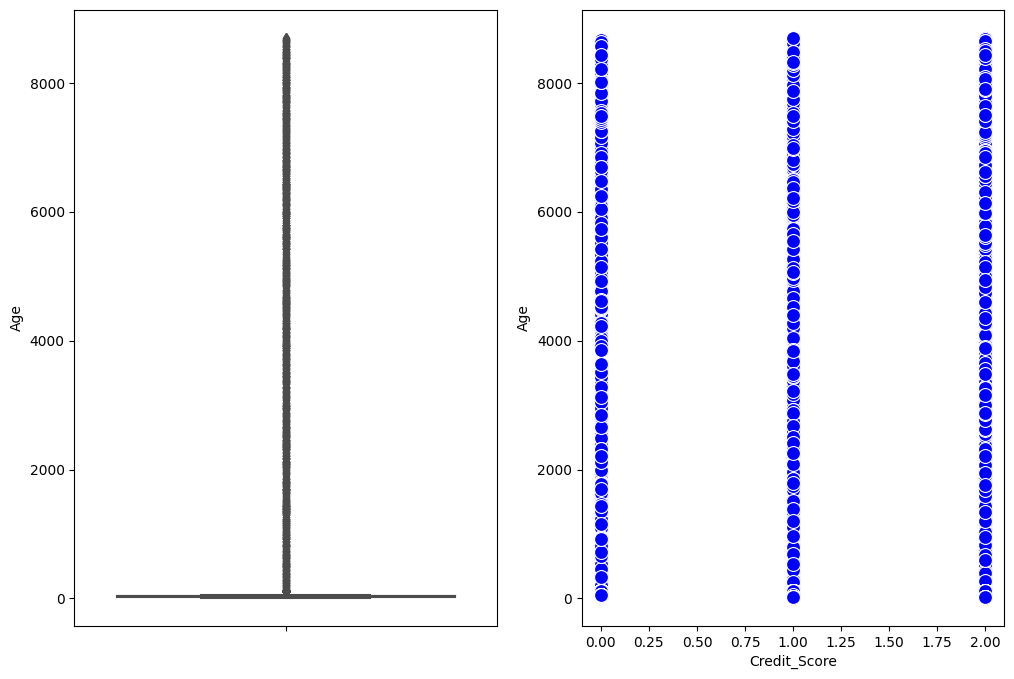

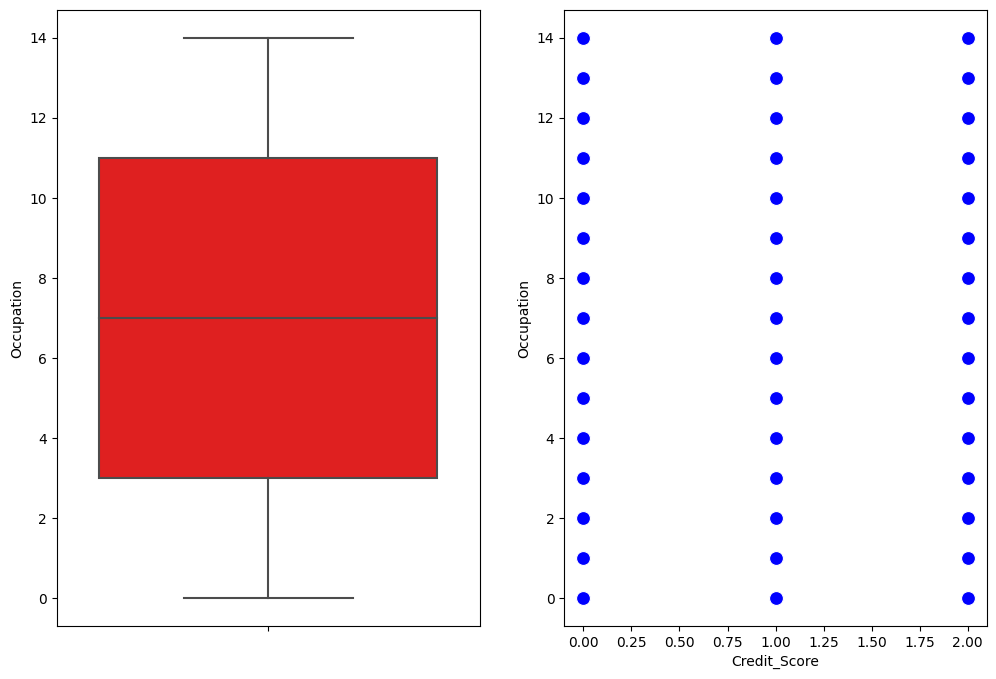

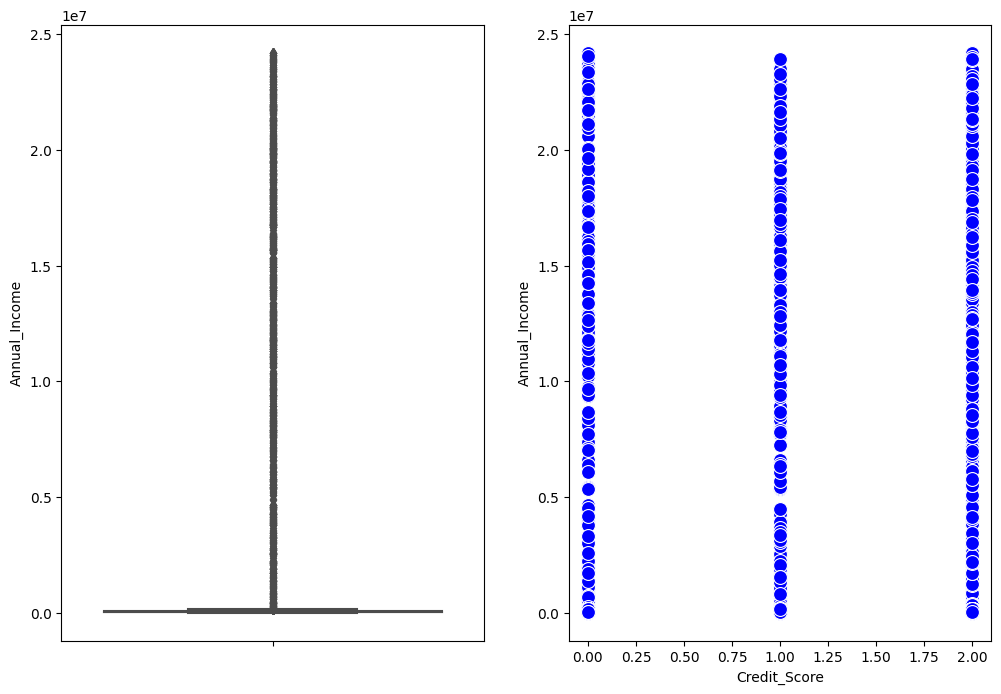

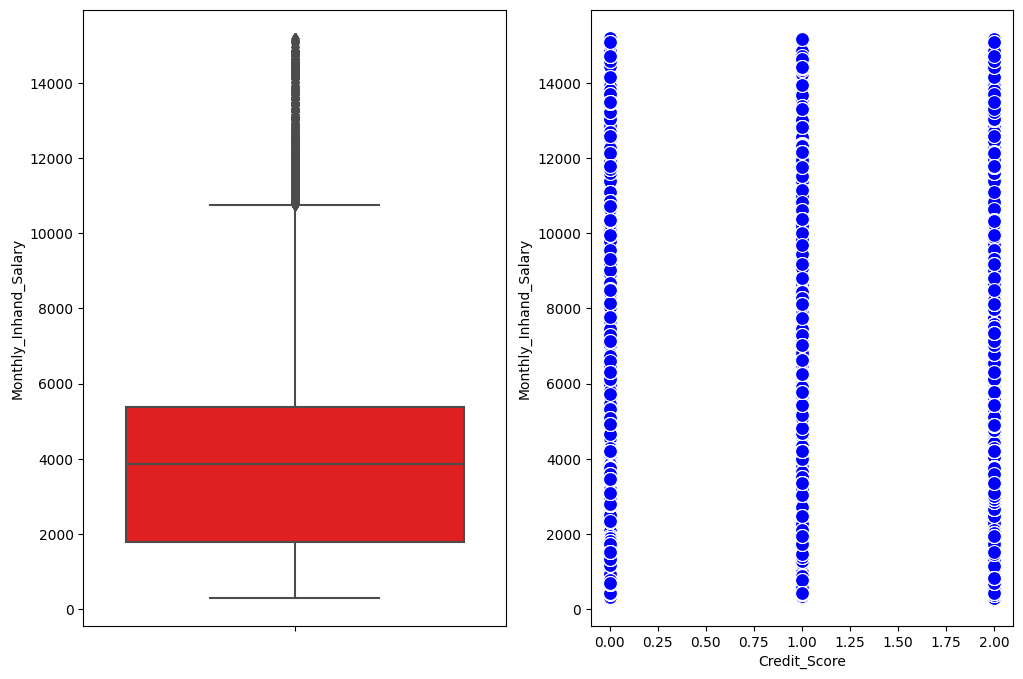

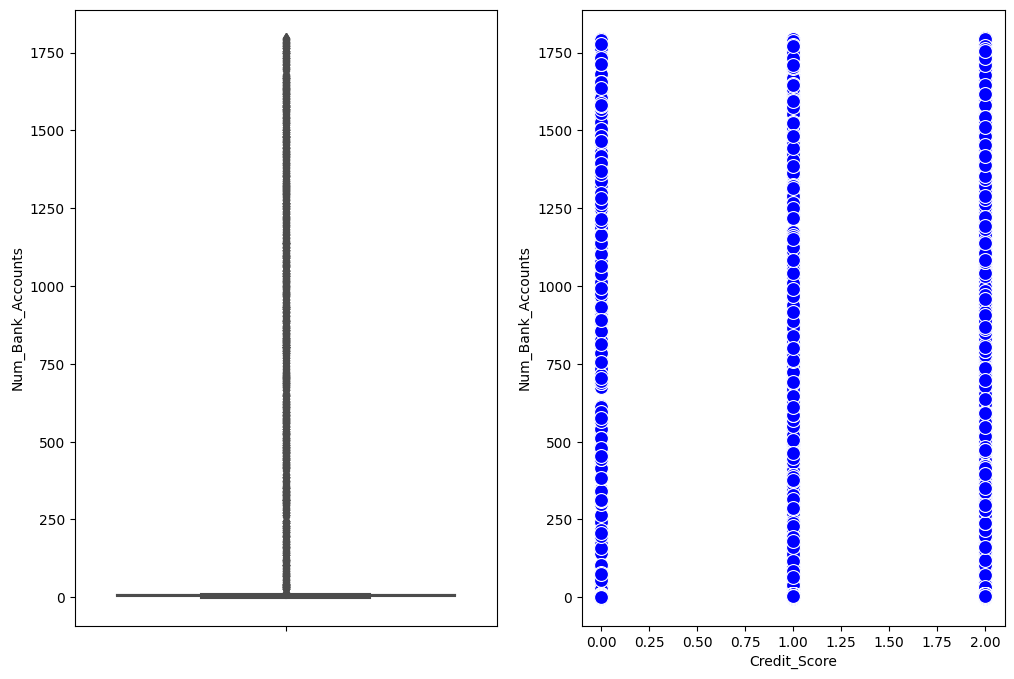

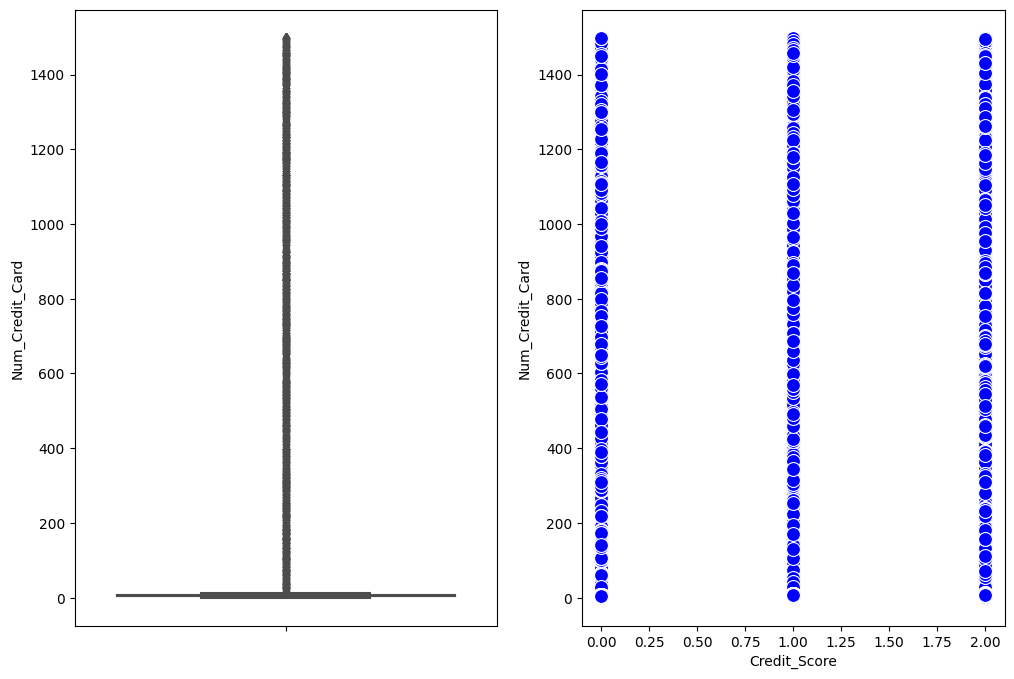

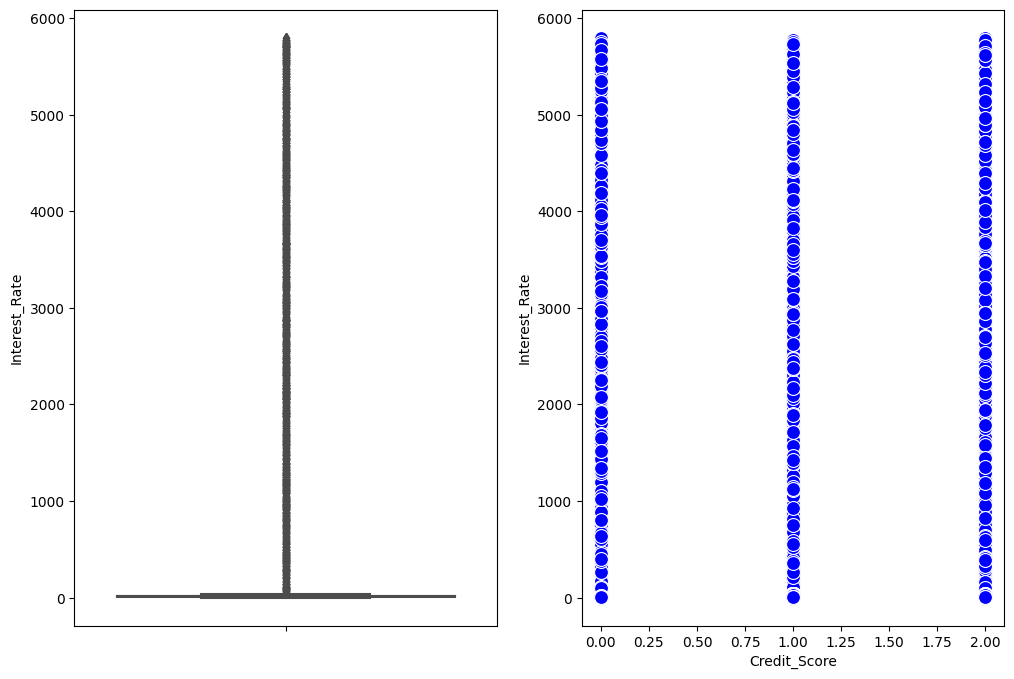

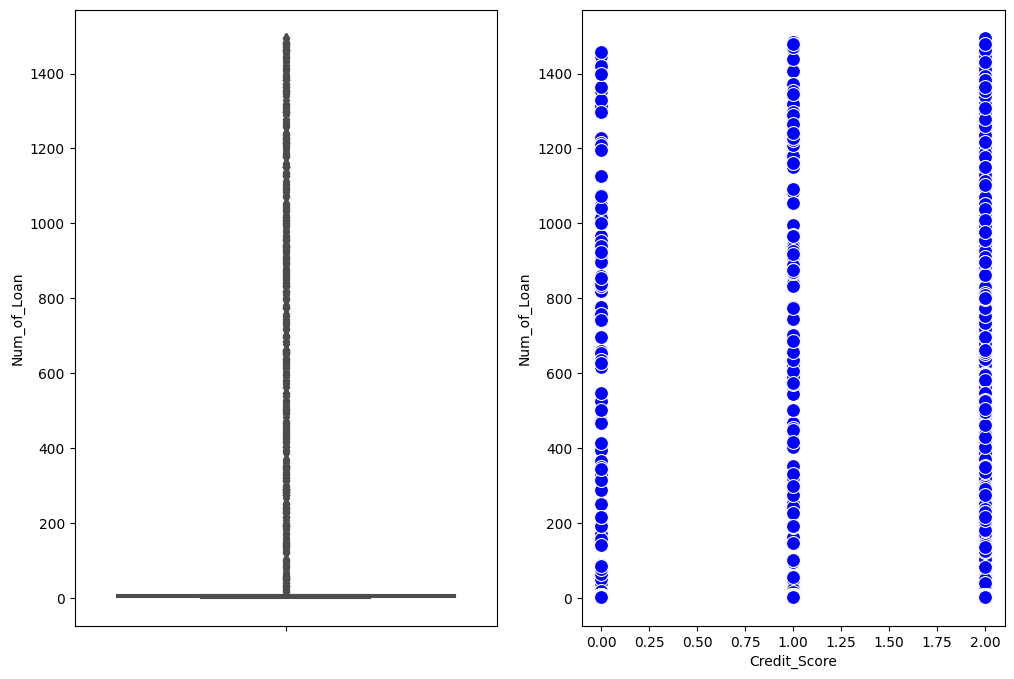

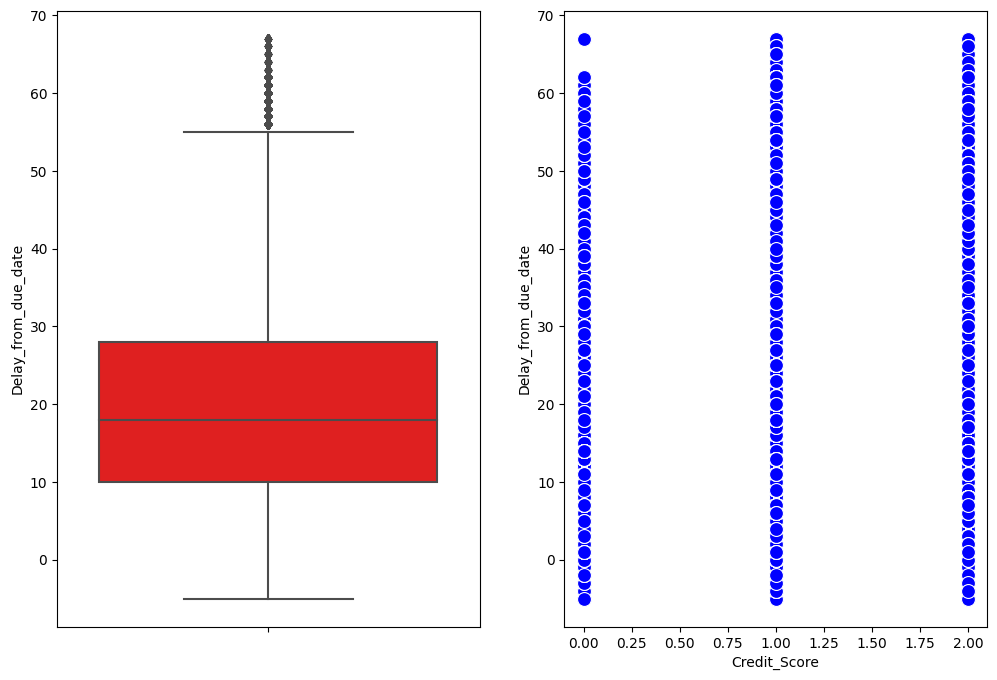

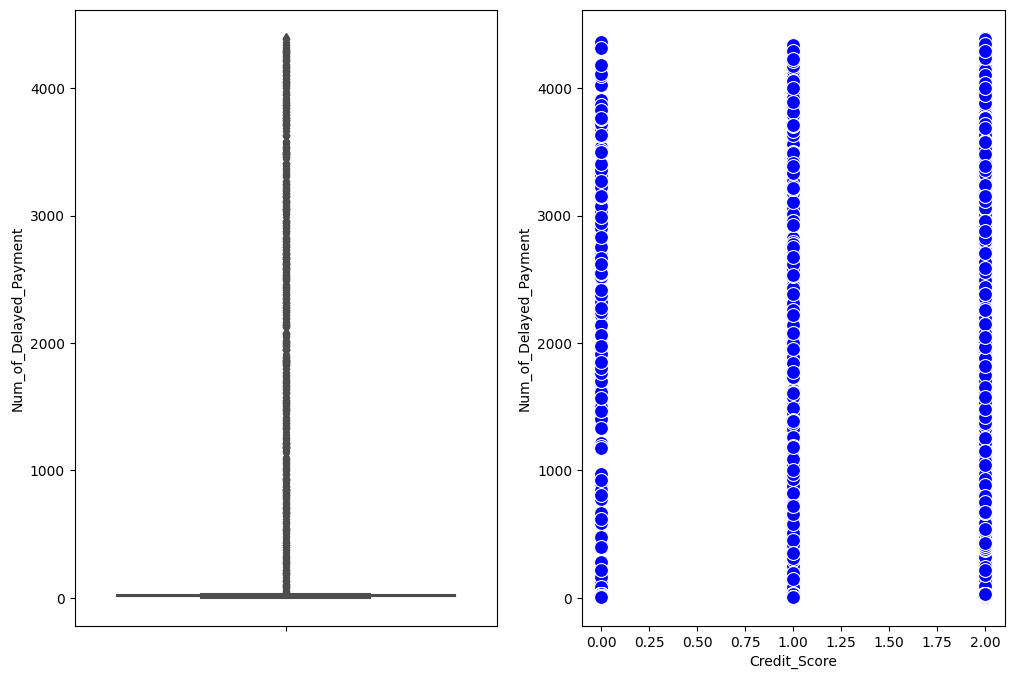

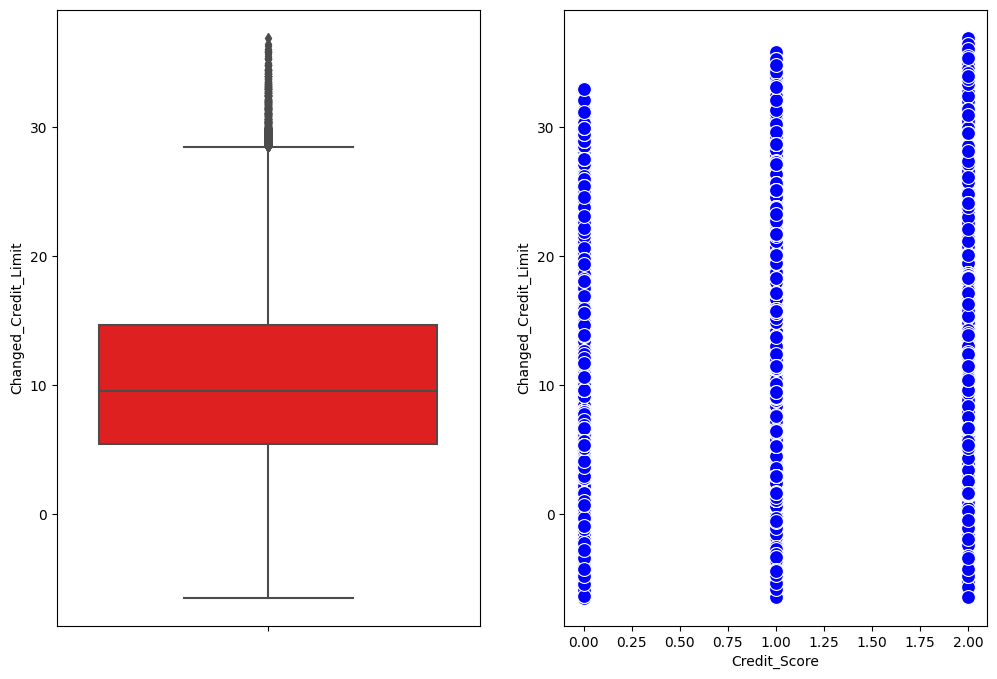

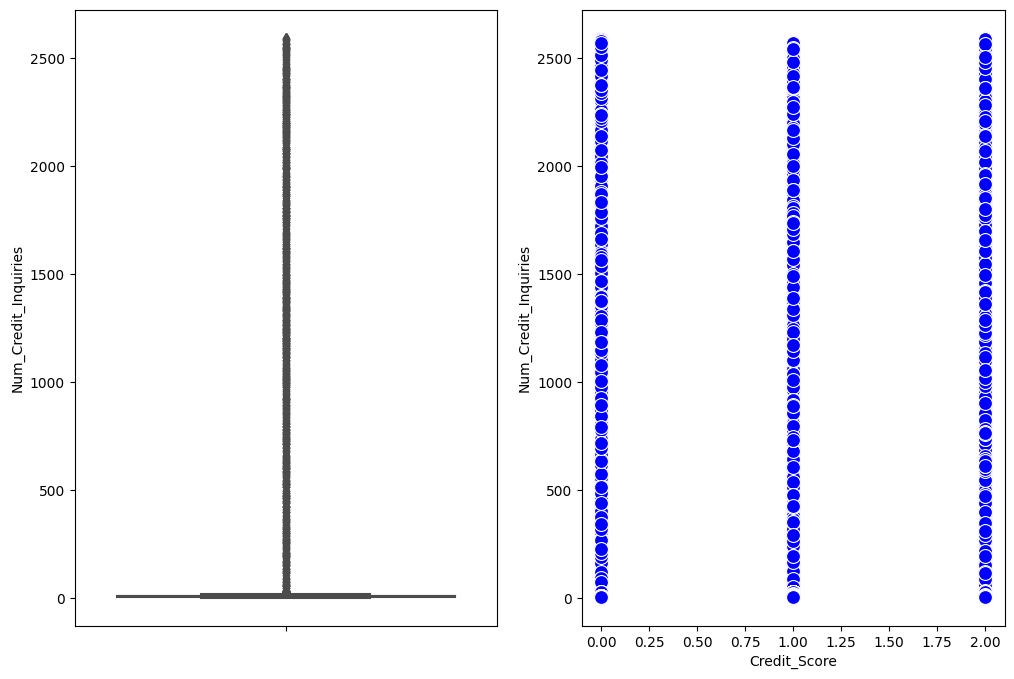

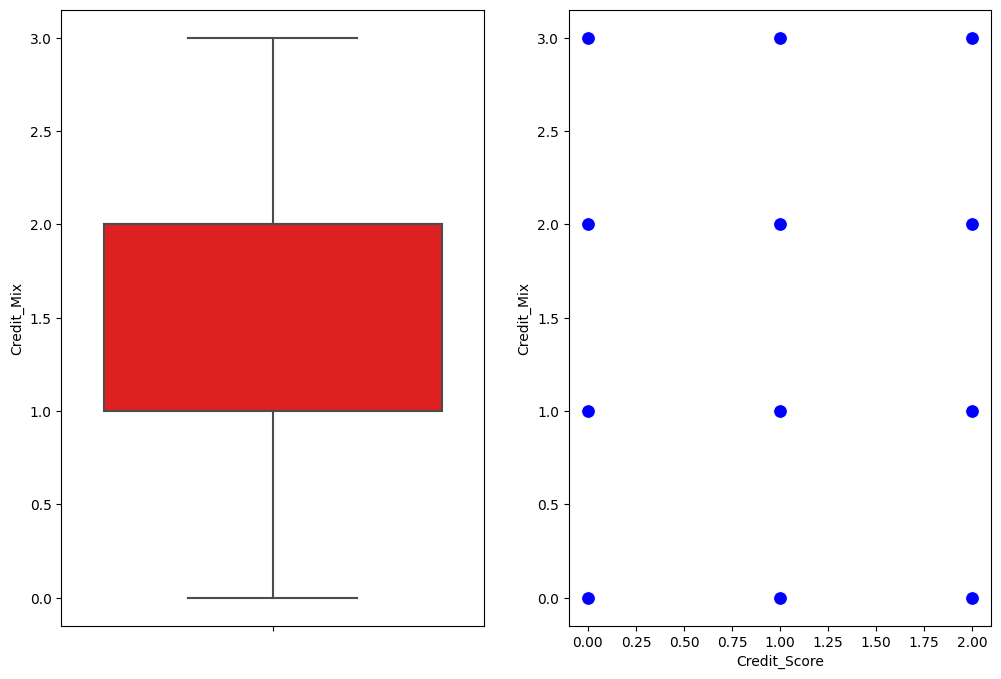

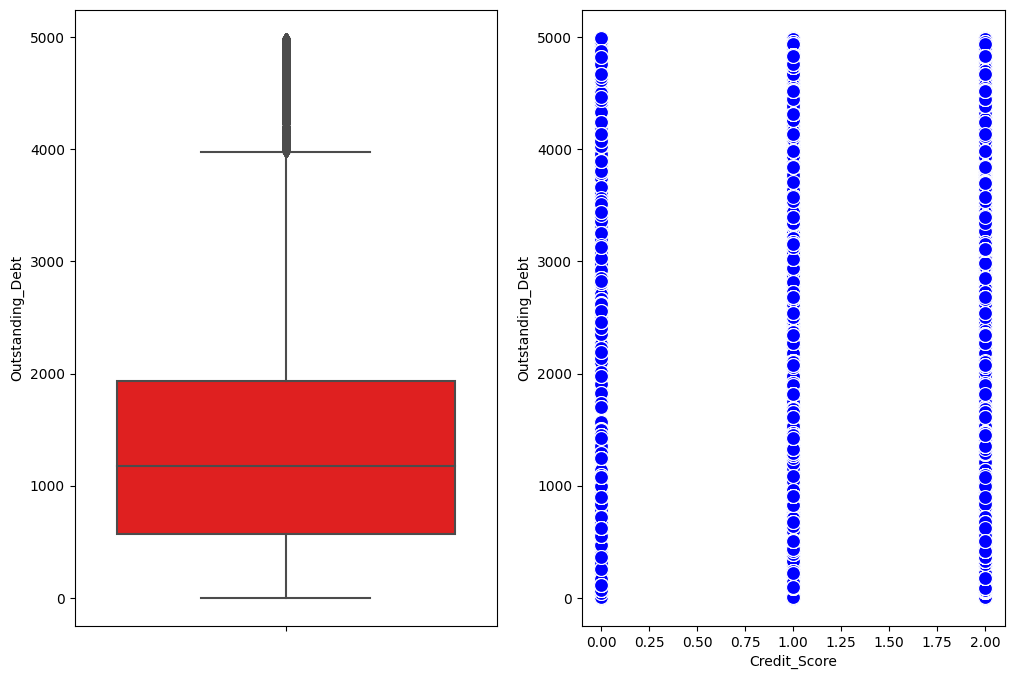

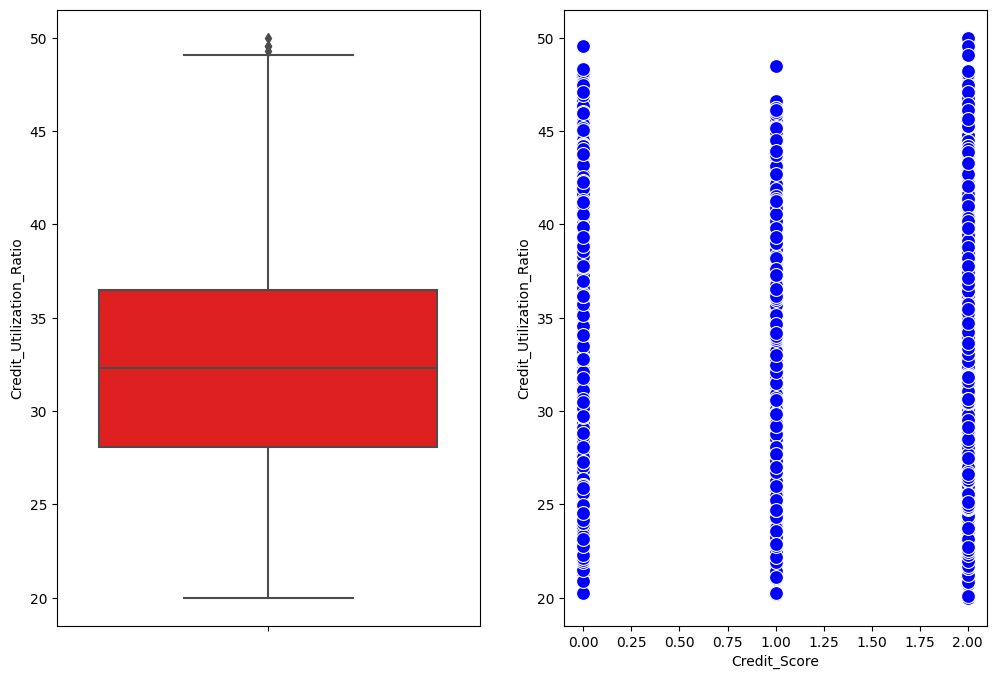

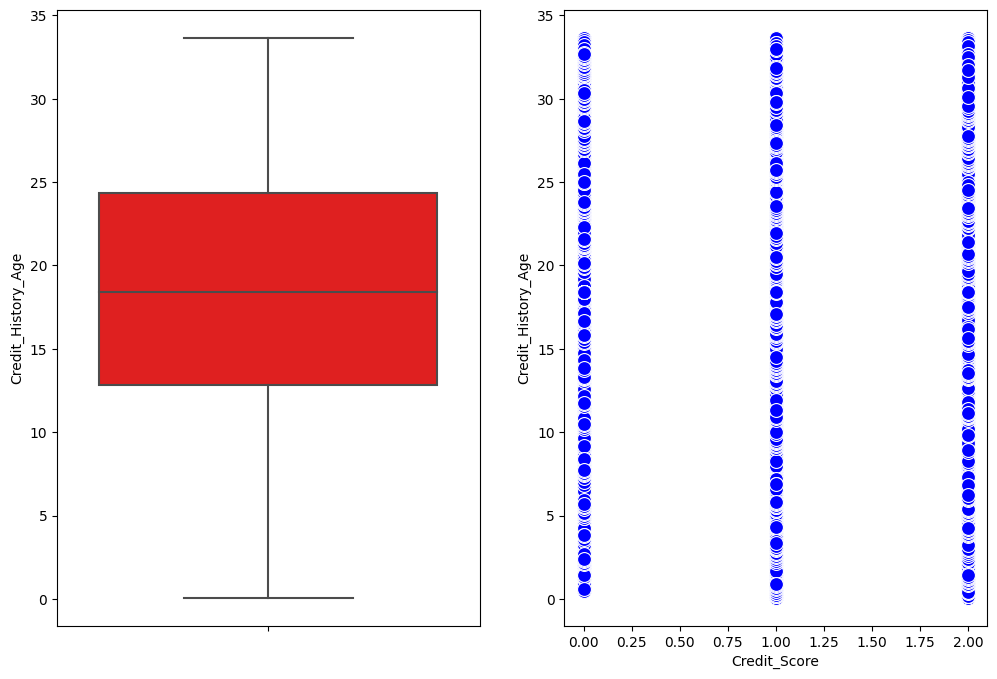

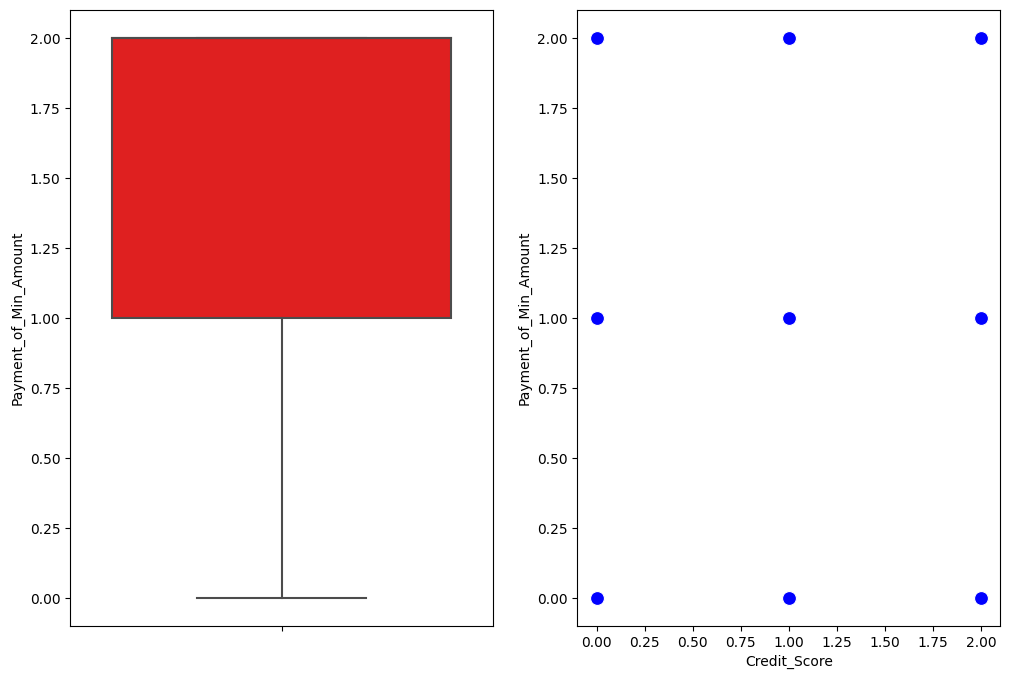

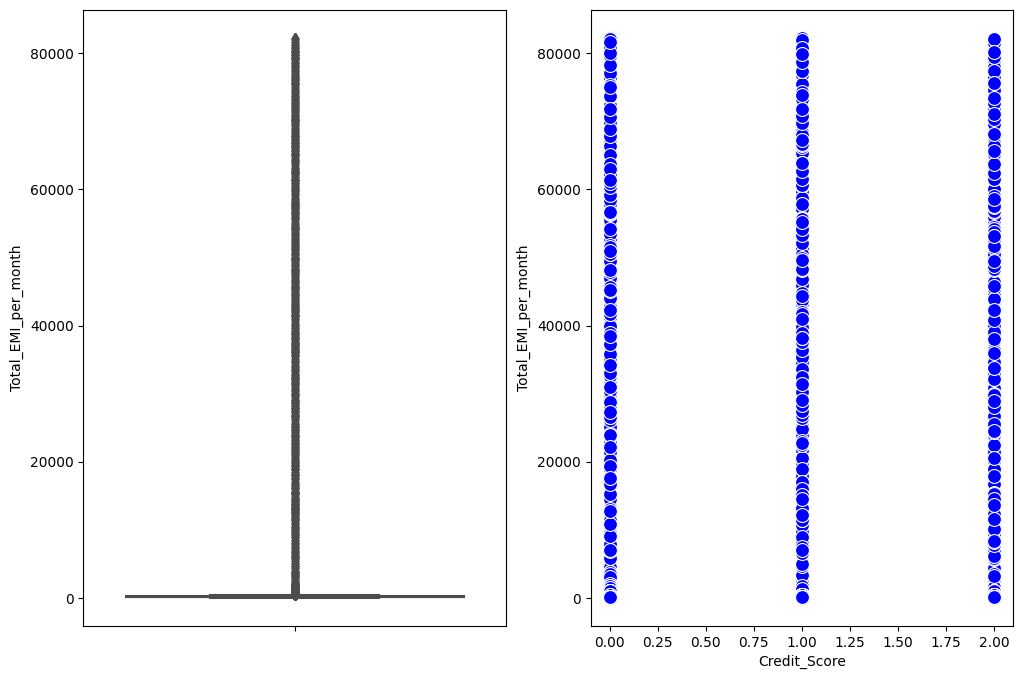

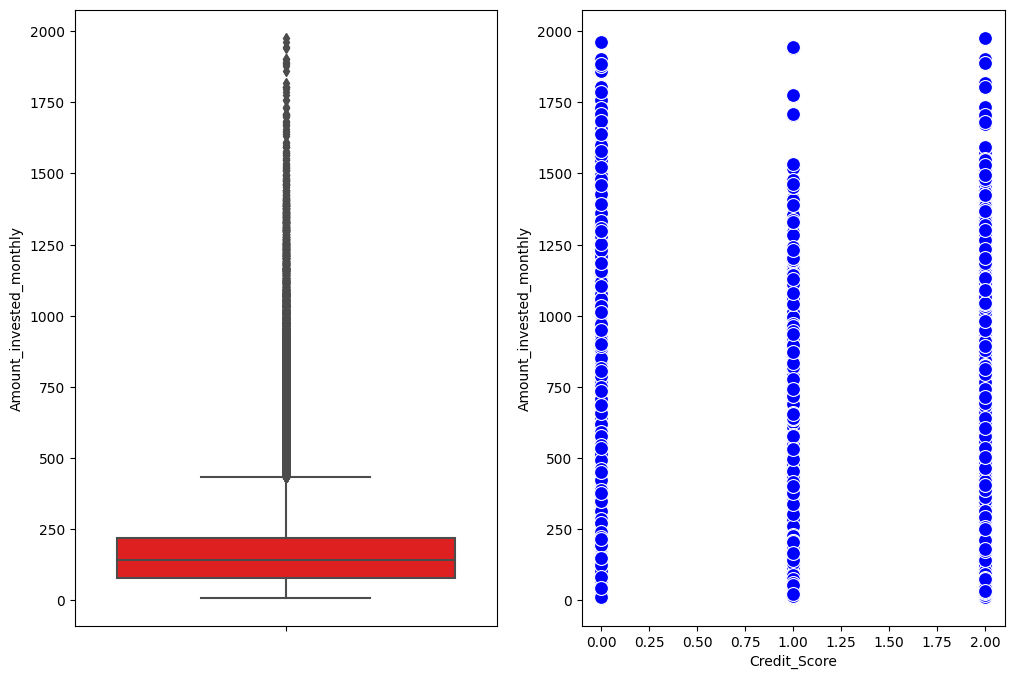

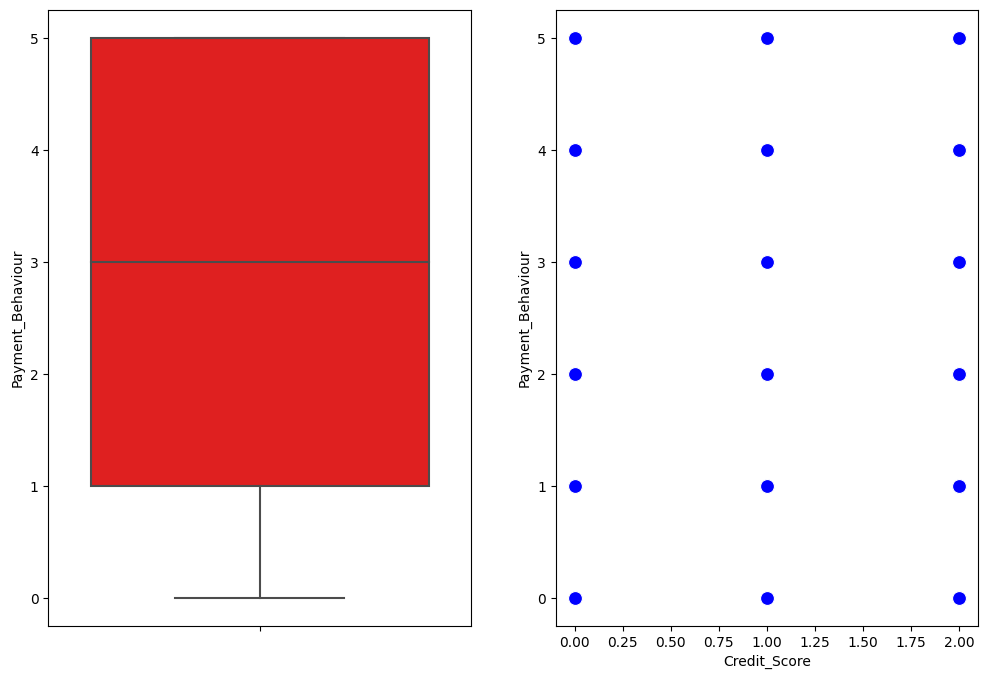

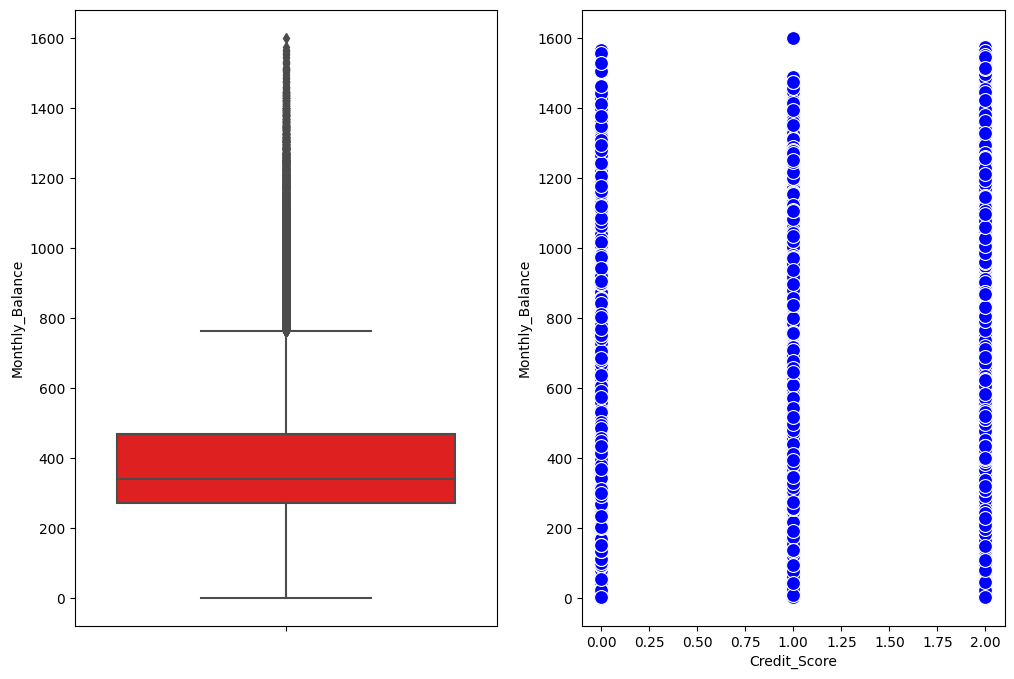

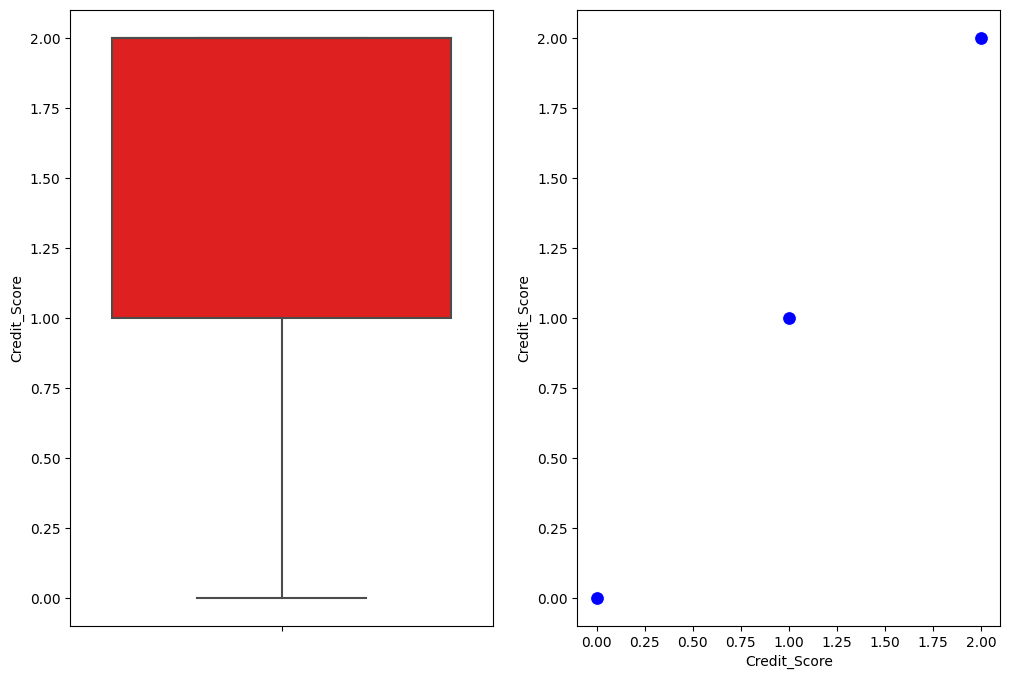

In [57]:
for col in numCols:
    fig, ax =plt.subplots(1,2, figsize=(12,8))
    sns.boxplot(data=data, y=col, ax=ax[0], color='red')
    sns.scatterplot(data=data,x = 'Credit_Score', s = 100, y=col, ax=ax[1], color ='blue')
    plt.show()

In [59]:
# Drop outliers by IQR calculation

for x in data.columns:
  Q1 = data[x].quantile(0.25)
  Q3 = data[x].quantile(0.75)
  IQR = Q3 - Q1
  data = data.drop(data.loc[data[x] > (Q3 + 1.5 * IQR)].index)
  data = data.drop(data.loc[data[x] < (Q1 - 1.5 * IQR)].index)
data.describe()

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
count,55041.000000,55041.000000,55041.000000,55041.000000,55041.000000,55041.000000,55041.000000,55041.000000,55041.000000,55041.000000,...,55041.000000,55041.000000,55041.000000,55041.000000,55041.000000,55041.000000,55041.000000,55041.000000,55041.000000,55041.000000
mean,33.382896,6.944005,46870.808167,3230.076071,5.300049,5.437492,14.177740,4.547872,19.318599,15.624217,...,1.689213,1226.411863,32.031996,18.899461,1.407296,74.694134,138.643924,2.813884,365.244159,1.378318
std,10.847891,4.298597,43117.457208,1872.663872,2.498487,1.994857,8.437075,2.473011,12.541547,7.986228,...,0.950345,840.700290,4.993050,7.548227,0.694262,69.494261,86.252608,1.819595,128.849608,0.753520
min,14.000000,0.000000,7005.930000,332.128333,-1.000000,0.000000,1.000000,1.000000,-5.000000,1.000000,...,0.000000,0.230000,21.264254,0.080000,0.000000,0.000000,10.010194,0.000000,1.705493,0.000000
25%,24.000000,3.000000,18525.130000,1625.558333,3.000000,4.000000,7.000000,2.000000,10.000000,10.000000,...,1.000000,555.740000,27.838992,13.830000,1.000000,24.636451,68.752491,1.000000,276.384891,1.000000
50%,33.000000,7.000000,32959.870000,2939.360000,5.000000,5.000000,13.000000,4.000000,17.000000,15.000000,...,2.000000,1134.390000,32.032332,18.433032,2.000000,53.024252,120.981325,3.000000,333.532125,2.000000
75%,42.000000,11.000000,59103.060000,4194.170850,7.000000,7.000000,19.000000,7.000000,26.000000,20.000000,...,2.000000,1673.310000,36.247039,24.500000,2.000000,103.317442,195.902413,5.000000,429.974145,2.000000
max,56.000000,14.000000,178793.920000,10722.410000,11.000000,11.000000,34.000000,9.000000,55.000000,31.816452,...,3.000000,3651.790000,43.947467,33.670000,2.000000,319.163202,401.936234,5.000000,745.378186,2.000000


In [63]:
#this is to see how the data changed after outliers handling
numCols = data.select_dtypes([np.number]).columns

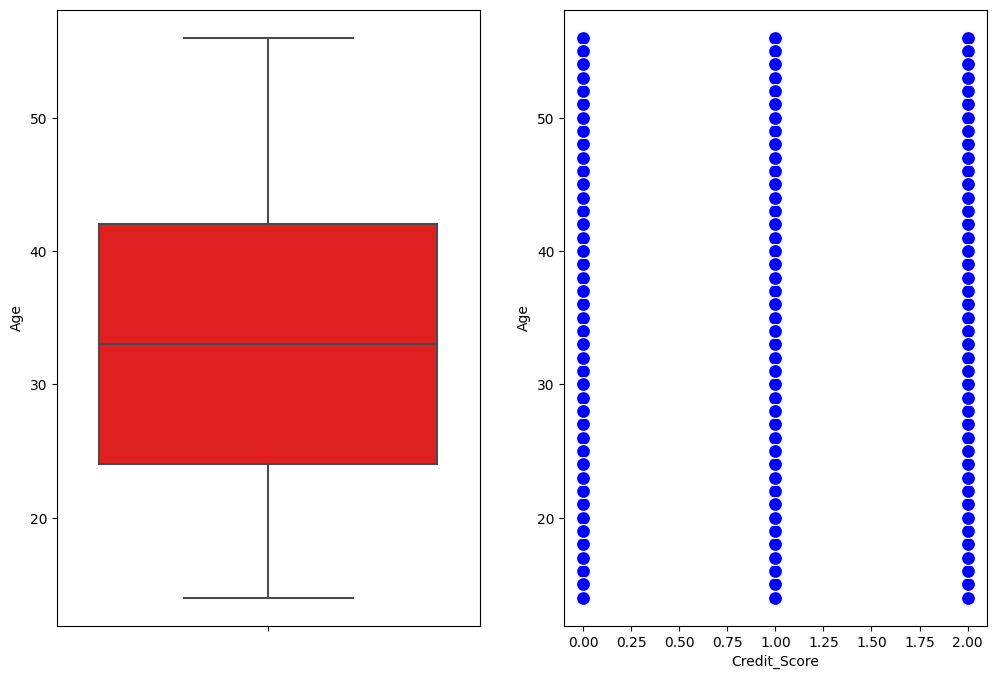

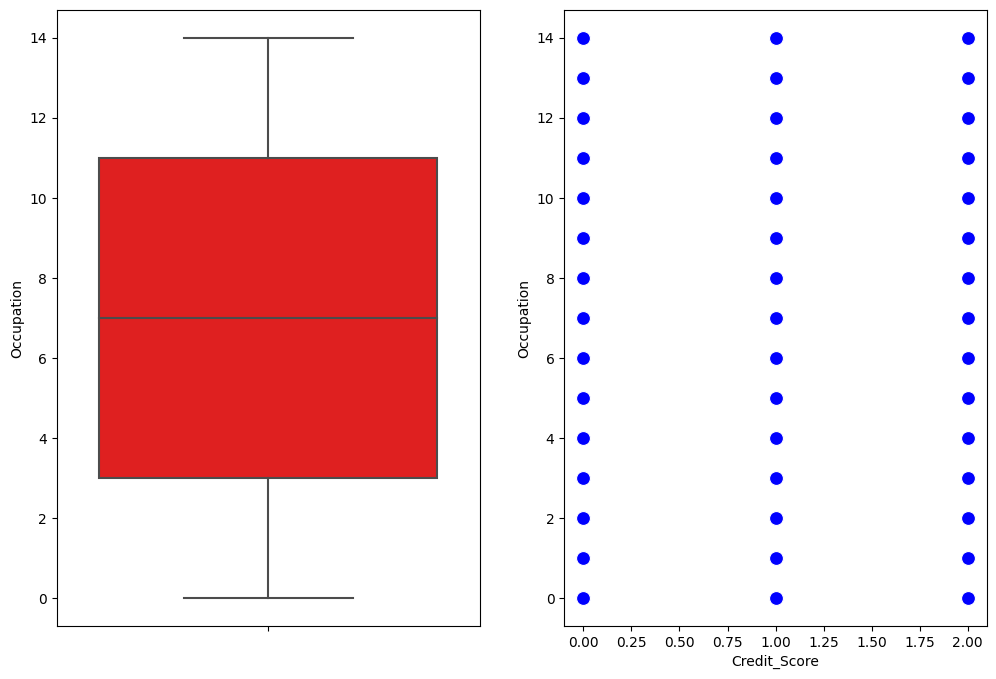

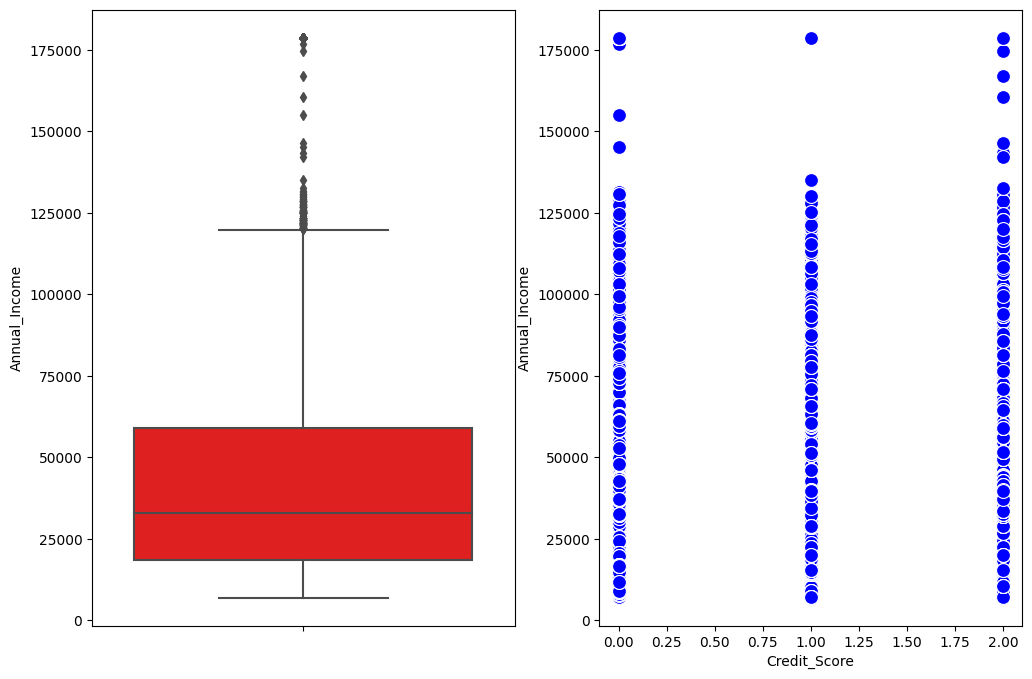

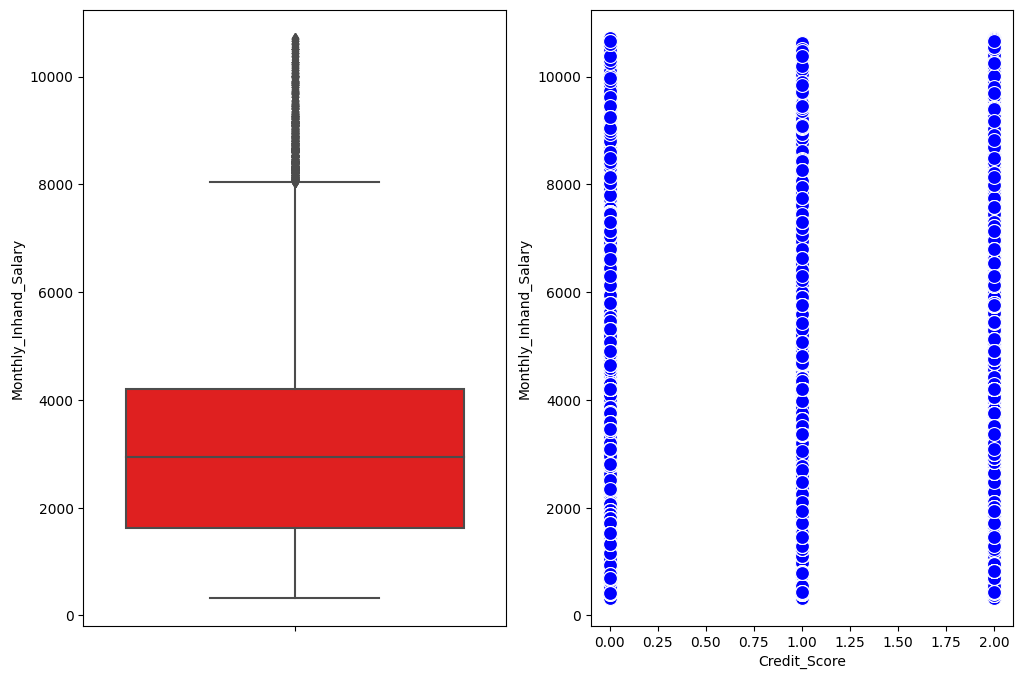

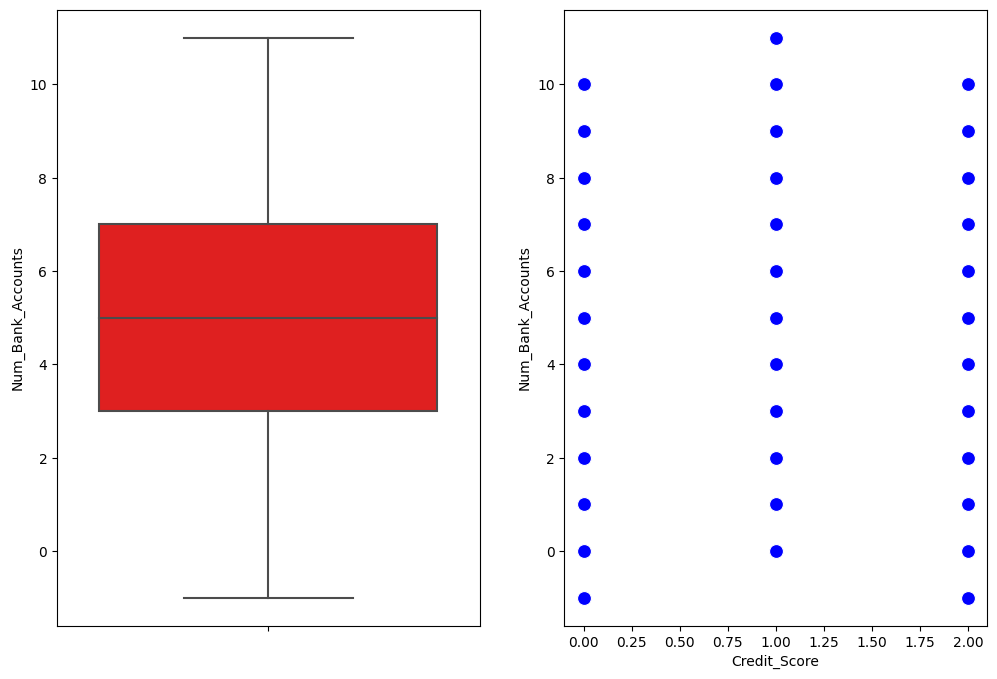

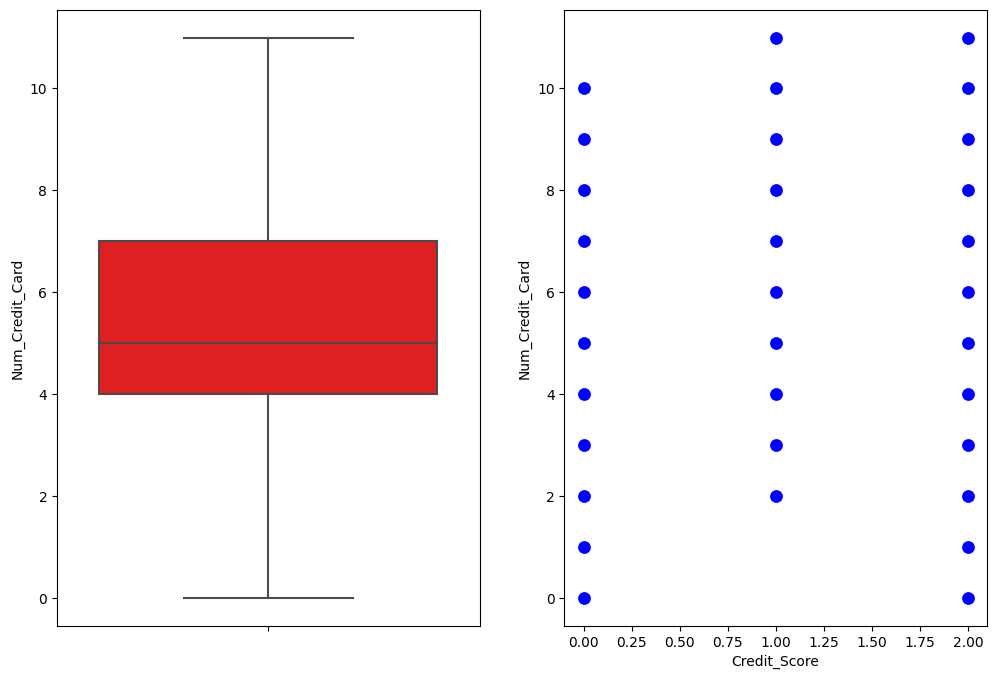

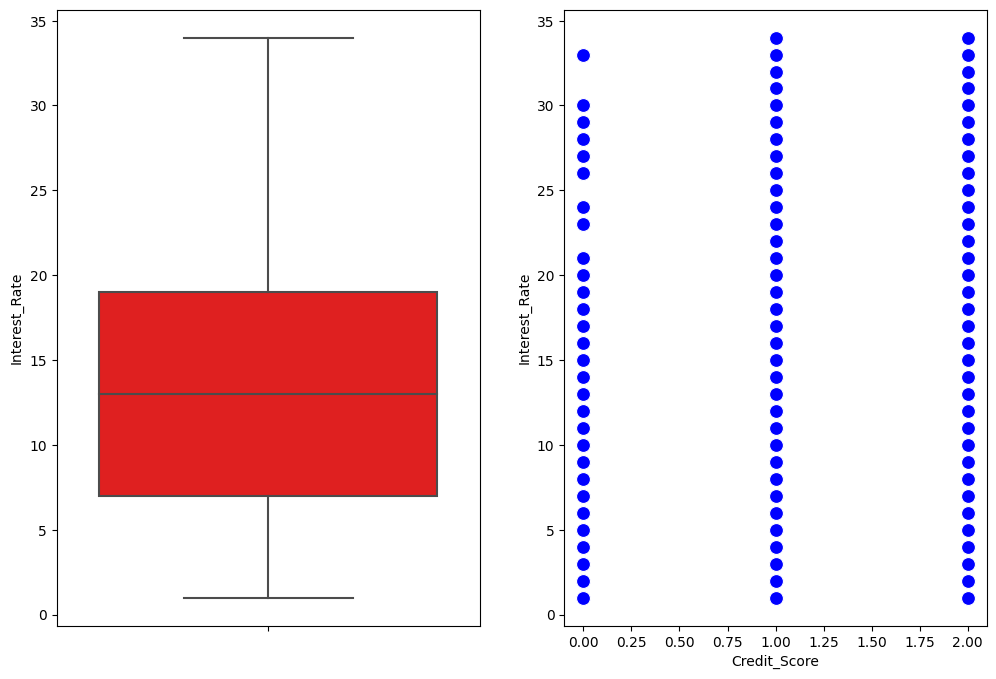

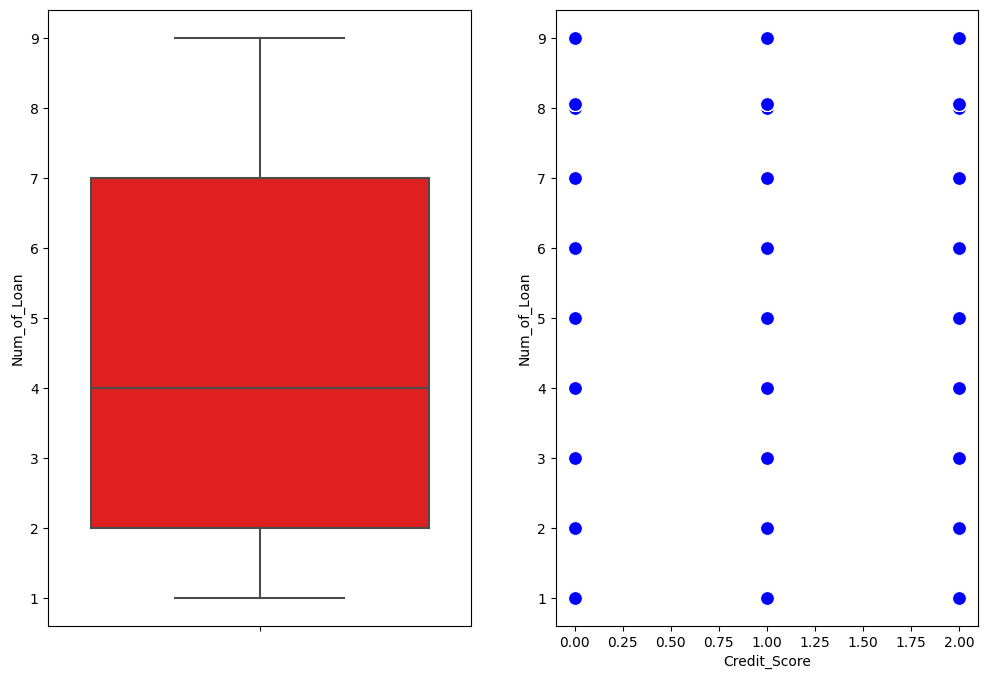

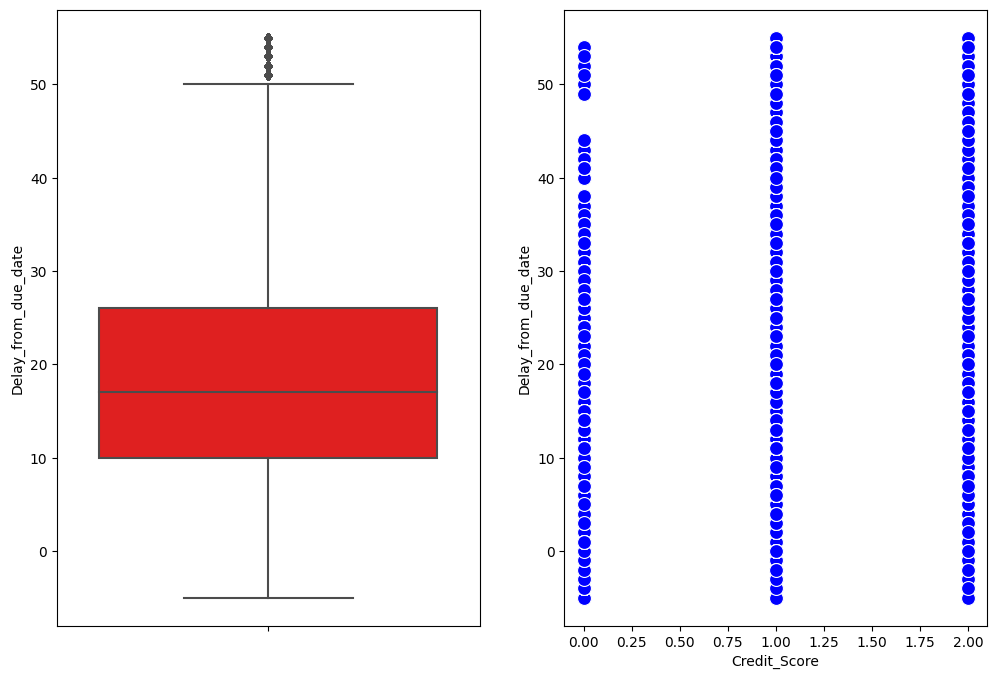

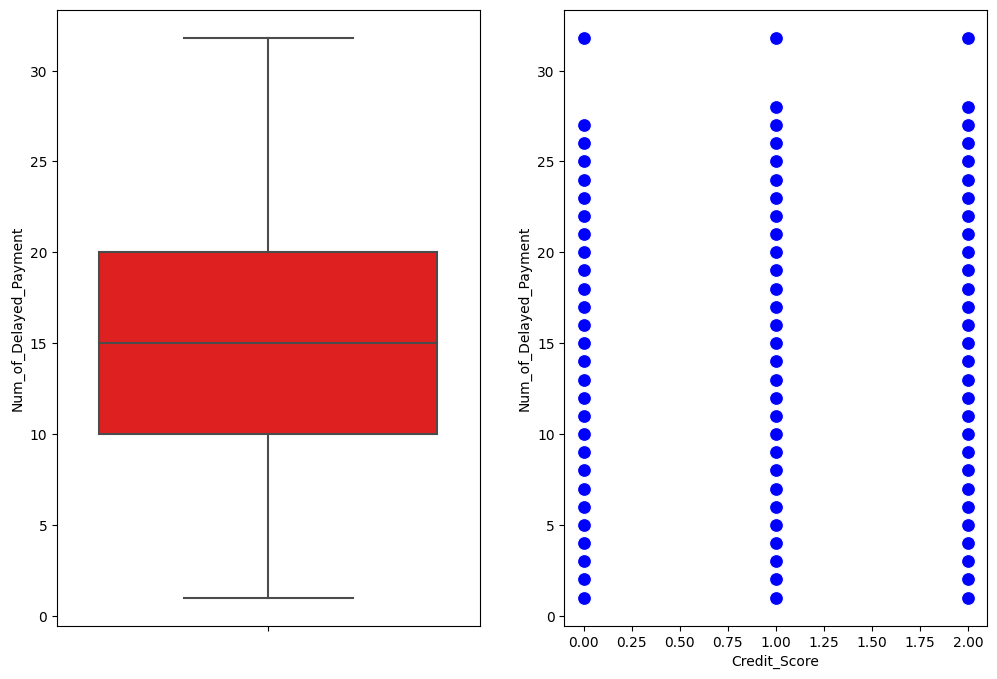

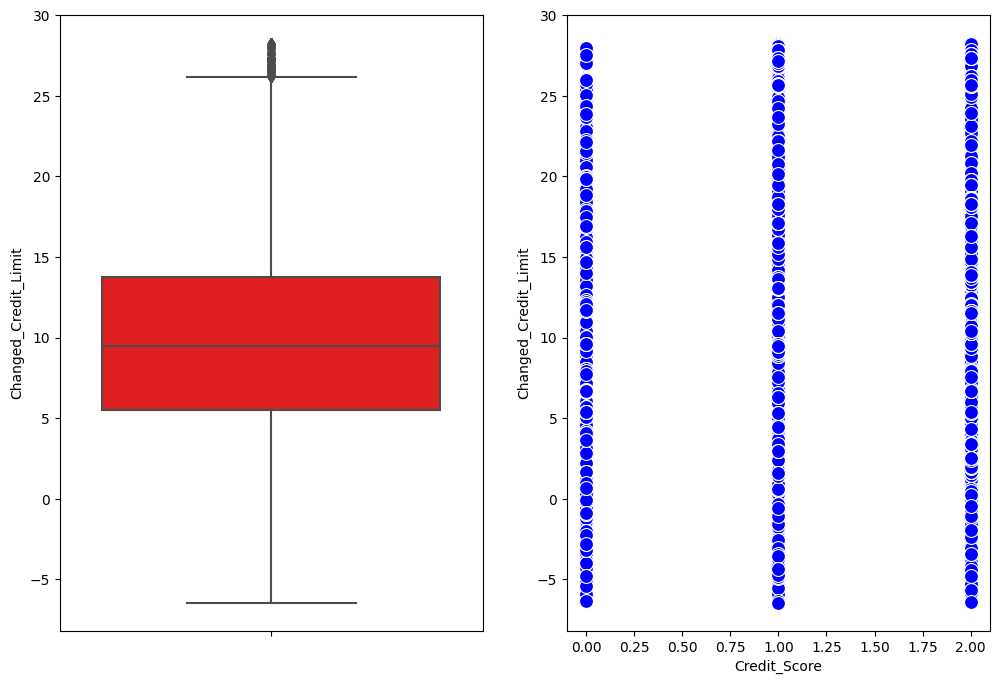

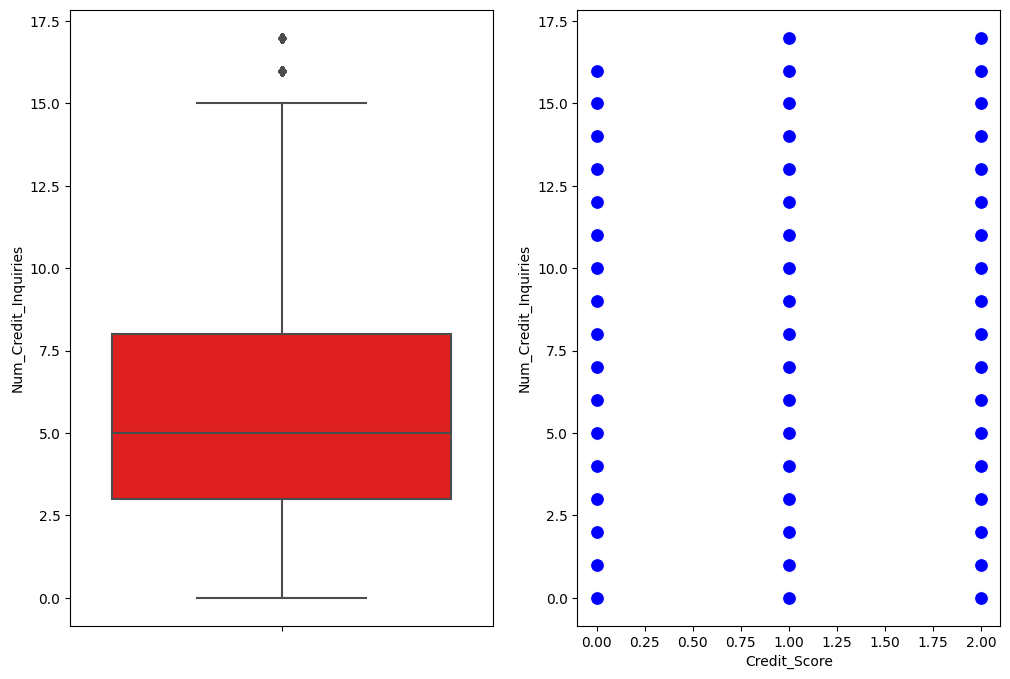

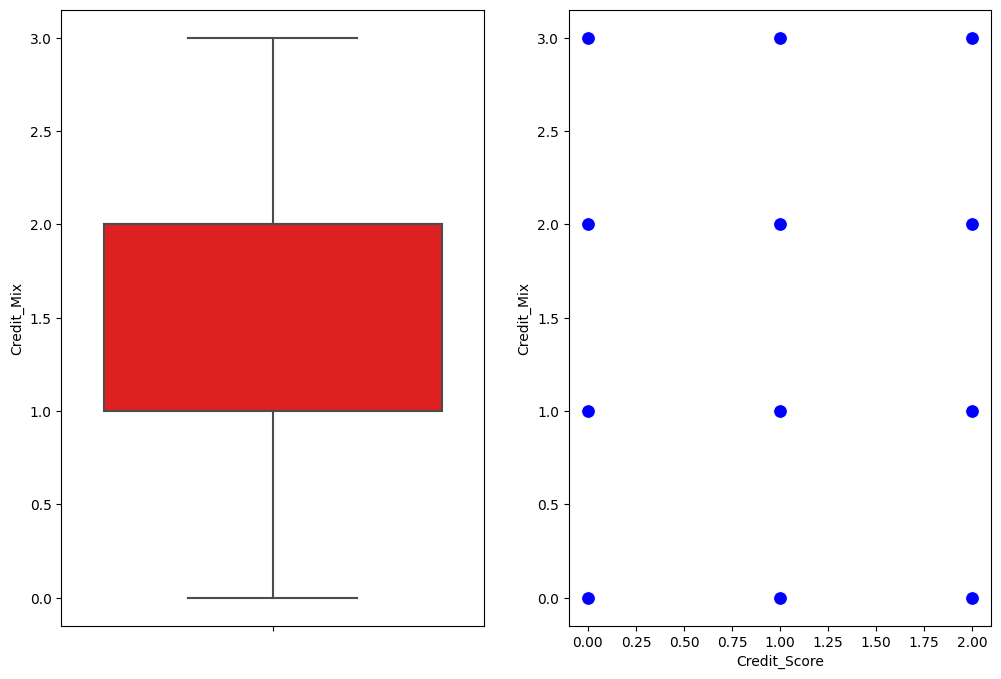

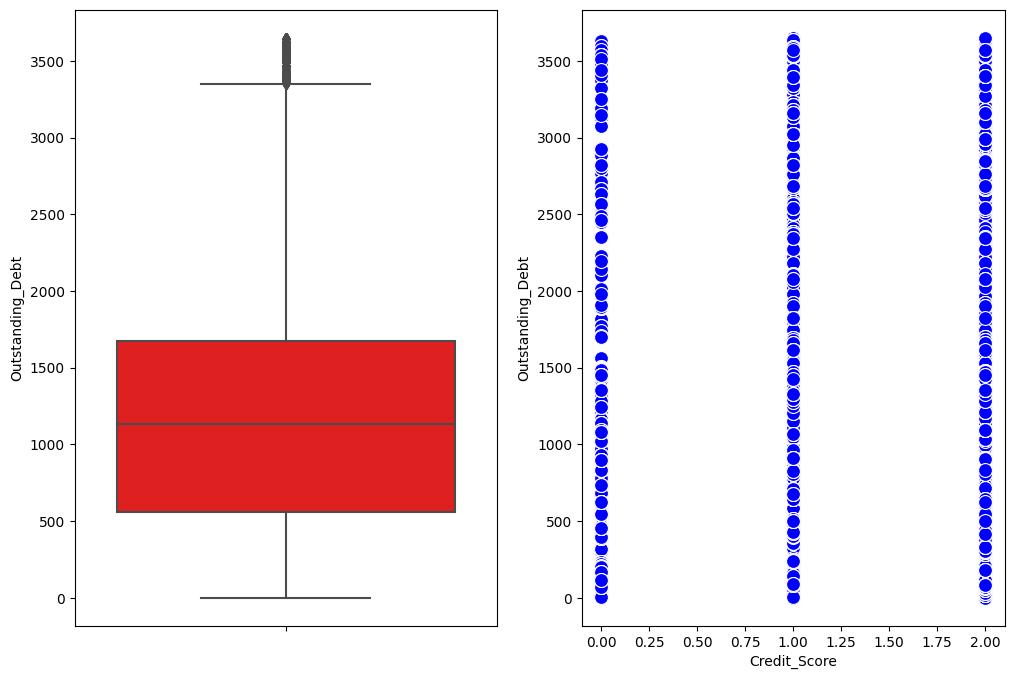

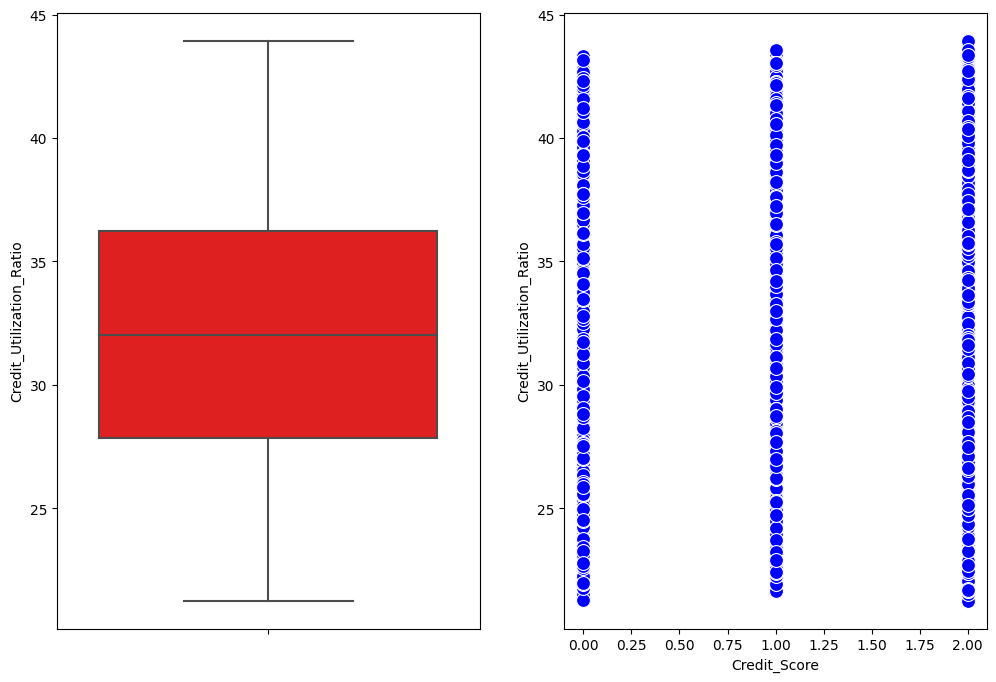

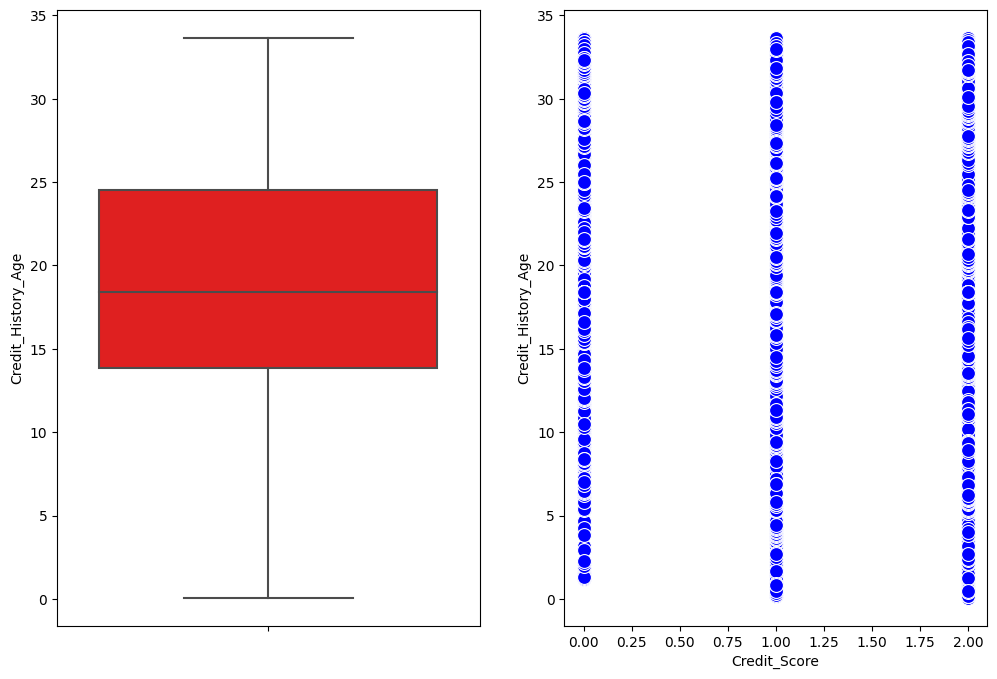

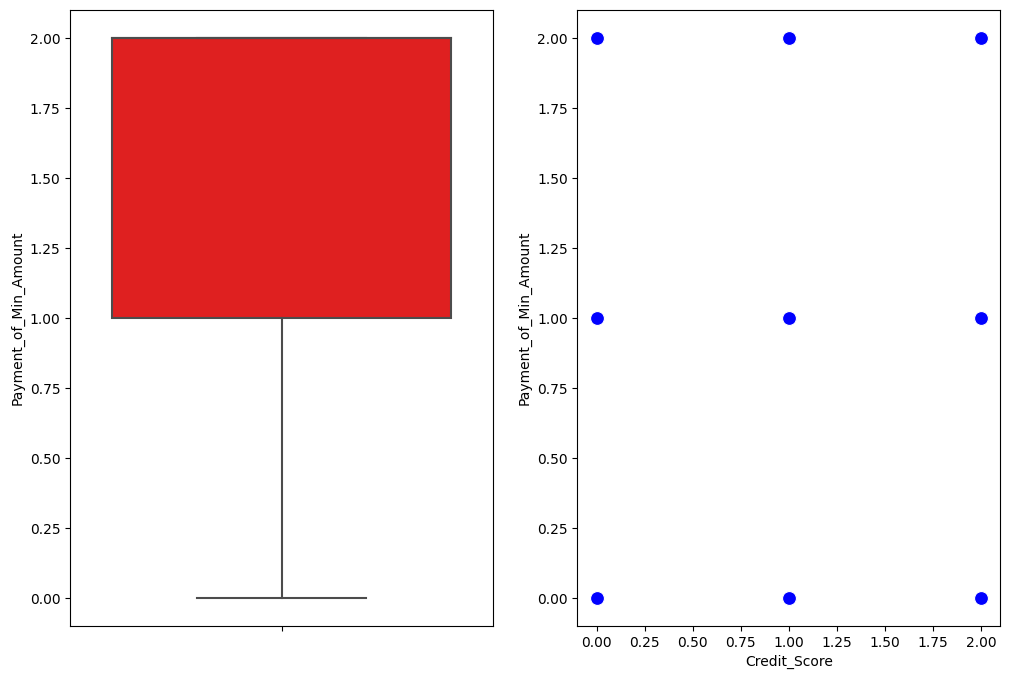

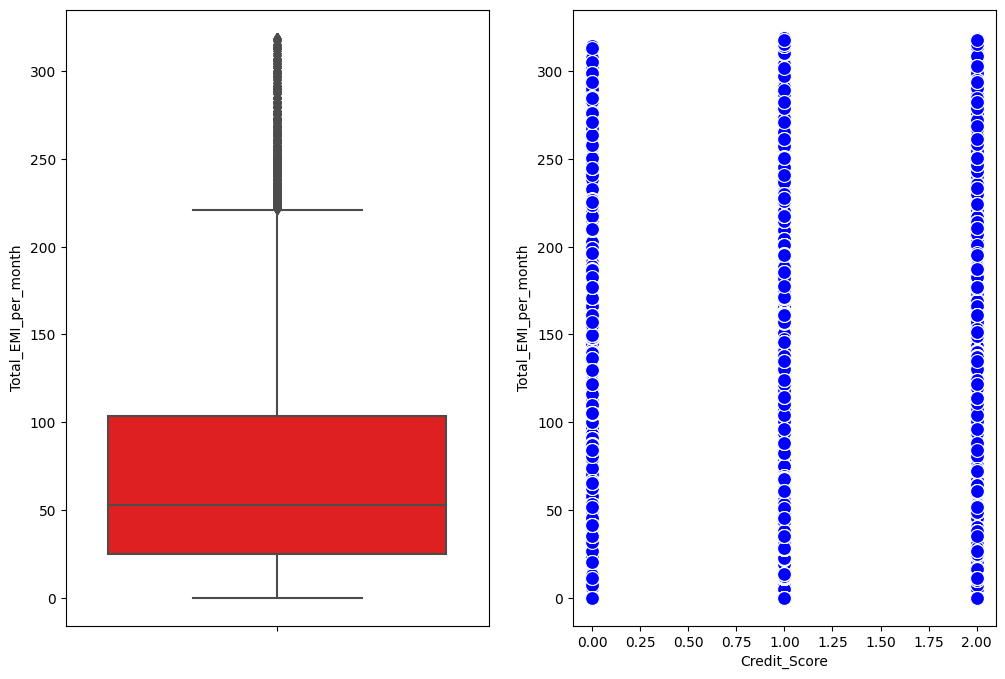

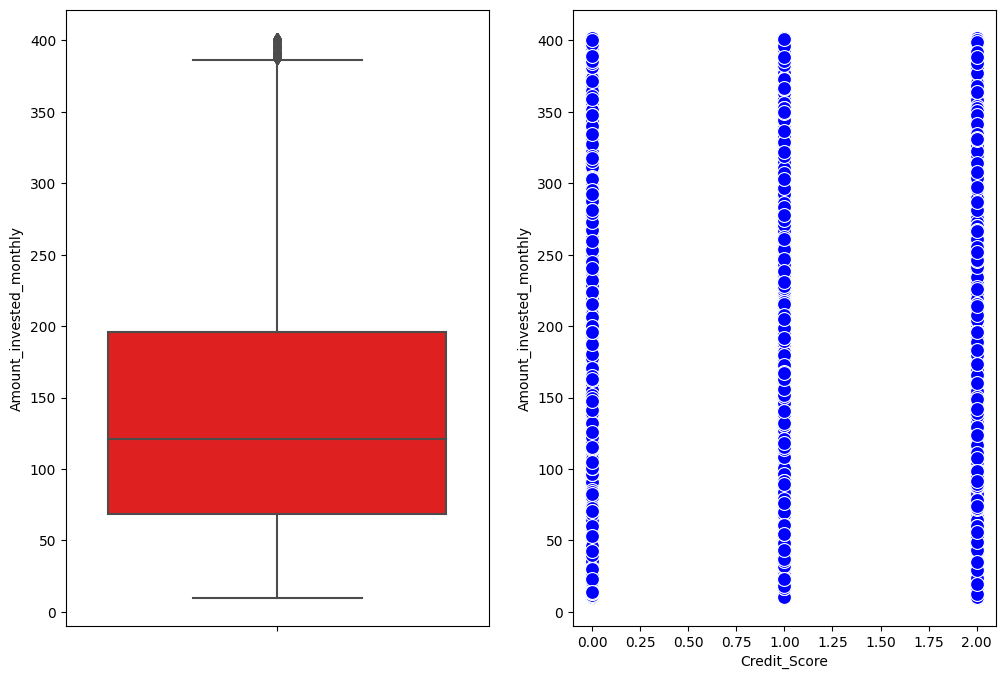

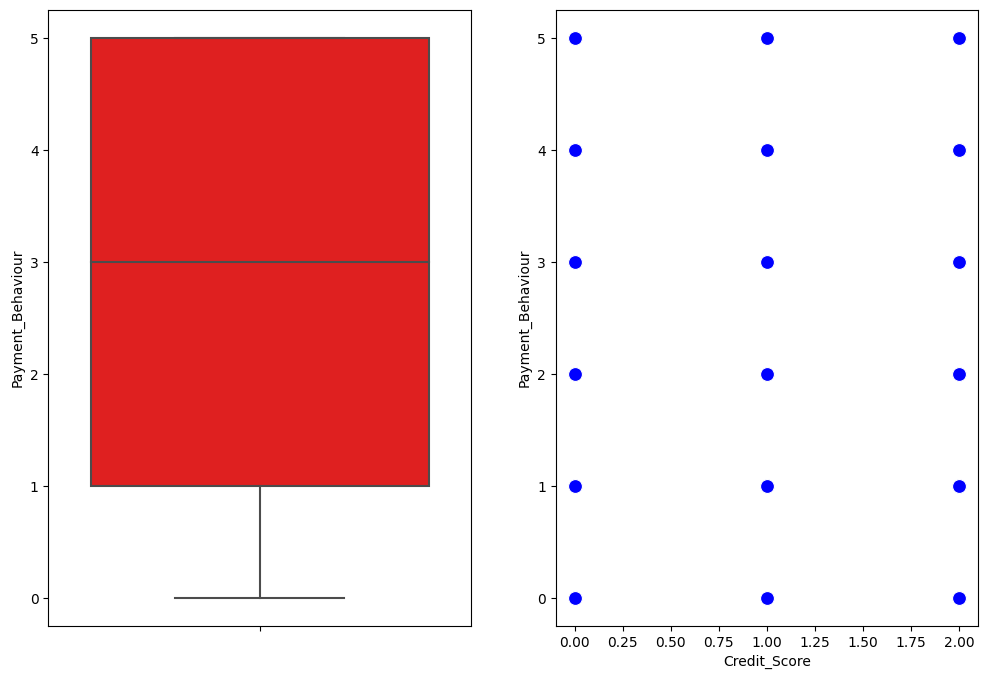

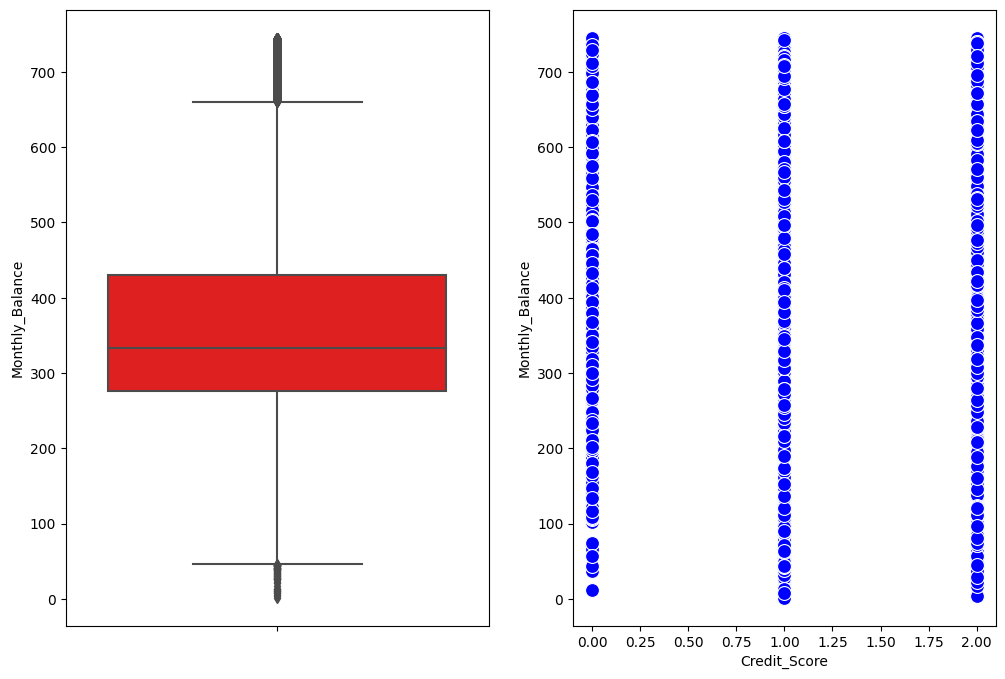

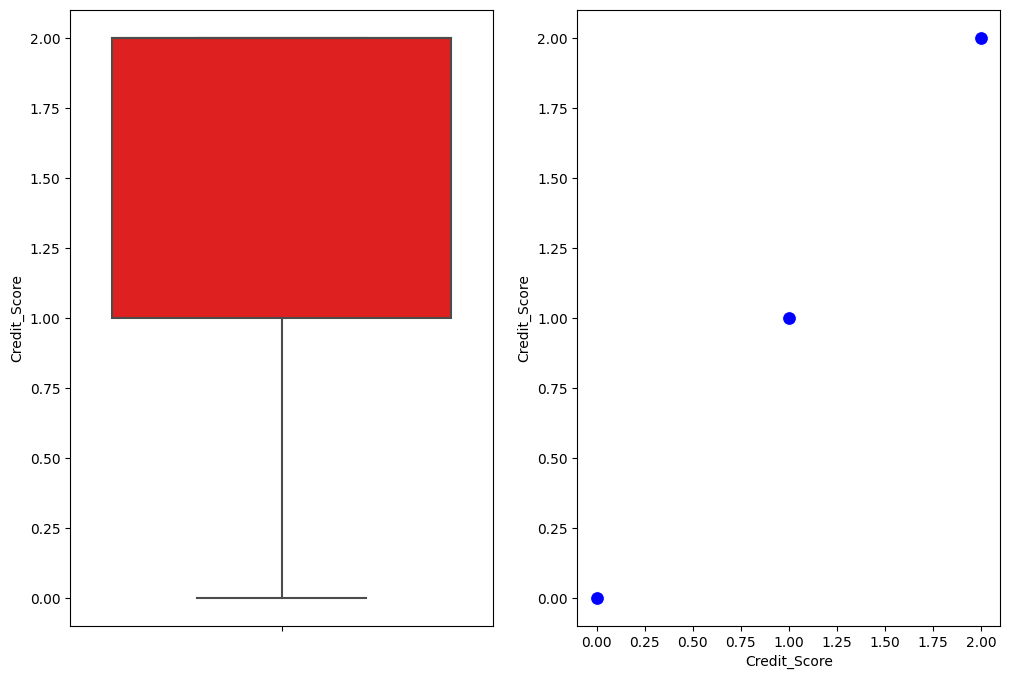

In [62]:
for col in numCols:
    fig, ax =plt.subplots(1,2, figsize=(12,8))
    sns.boxplot(data=data, y=col, ax=ax[0], color='red')
    sns.scatterplot(data=data,x = 'Credit_Score', s = 100, y=col, ax=ax[1], color ='blue')
    plt.show()

# **Feature Selection**

In [64]:
round(abs(data.corr()['Credit_Score']*100).sort_values(ascending=False), 2) #the strongest correlated features after all data preprocessing

Credit_Score                100.00
Credit_Mix                   19.16
Changed_Credit_Limit         18.42
Payment_of_Min_Amount        17.50
Num_Bank_Accounts            15.34
Interest_Rate                 8.77
Delay_from_due_date           8.66
Num_Credit_Card               8.22
Credit_History_Age            7.44
Num_of_Delayed_Payment        6.92
Age                           5.41
Num_Credit_Inquiries          3.82
Payment_Behaviour             1.97
Outstanding_Debt              1.97
Monthly_Balance               1.29
Occupation                    1.04
Total_EMI_per_month           0.96
Annual_Income                 0.88
Monthly_Inhand_Salary         0.74
Amount_invested_monthly       0.61
Credit_Utilization_Ratio      0.14
Num_of_Loan                   0.04
Name: Credit_Score, dtype: float64

<Axes: >

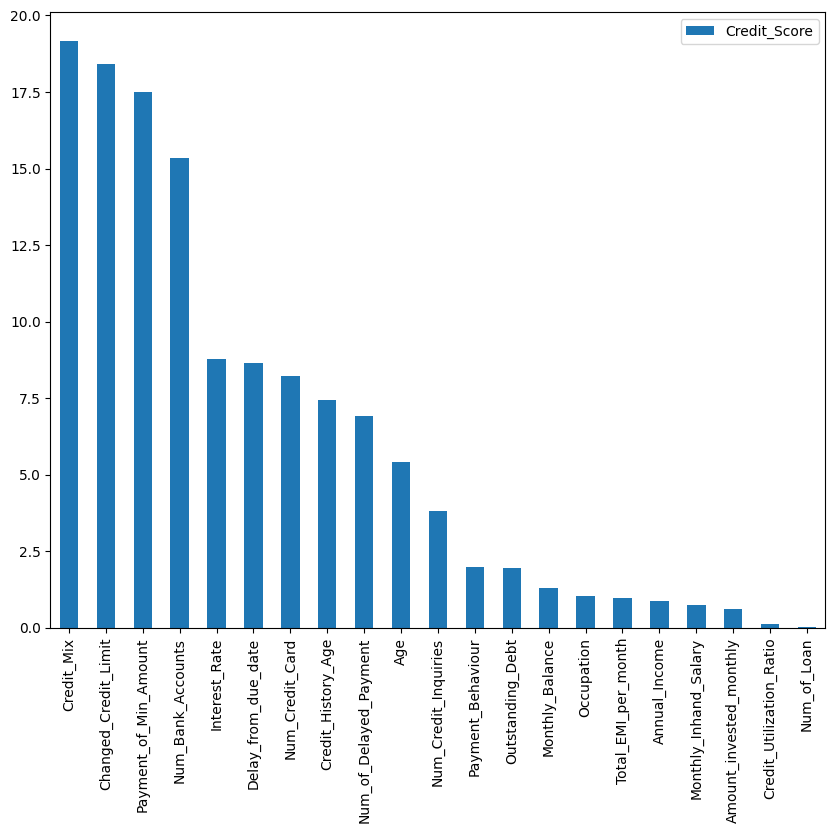

In [66]:
#a bar plot showing the absolute correlation values of all the columns in the "data" dataframe with the "Credit_Score" column
pd.DataFrame(abs(data.corr()['Credit_Score'].drop('Credit_Score')*100).sort_values(ascending=False)).plot.bar(figsize = (10,8))

In [80]:
mdf = data[['Credit_Score','Changed_Credit_Limit', 'Payment_of_Min_Amount', 'Credit_Mix', 'Delay_from_due_date', 'Annual_Income', 'Monthly_Inhand_Salary', 'Age', 'Monthly_Balance', 'Num_of_Delayed_Payment', 'Outstanding_Debt', 'Payment_Behaviour', 'Credit_History_Age', 'Num_Bank_Accounts', 'Credit_Utilization_Ratio']]

# **Modeling**





In [108]:
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split    
from sklearn.preprocessing import RobustScaler as rbScaler  

In [109]:
x = mdf.drop(['Credit_Score'] , axis = 1).values
y = mdf['Credit_Score' ].values

In [110]:
x_train , x_test , y_train , y_test = train_test_split(x,y , test_size= 0.25 , random_state=42) #split data
[x_train.shape, y_train.shape] 


[(41280, 21), (41280,)]

In [111]:
ro_scaler = rbScaler() #data scaling using robust scaler
x_train = ro_scaler.fit_transform(x_train)
x_test = ro_scaler.fit_transform(x_test)
[x_train.shape, x_test.shape]

[(41280, 21), (13761, 21)]

In [112]:
mdf.describe()

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
count,55041.000000,55041.000000,55041.000000,55041.000000,55041.000000,55041.000000,55041.000000,55041.000000,55041.000000,55041.000000,...,55041.000000,55041.000000,55041.000000,55041.000000,55041.000000,55041.000000,55041.000000,55041.000000,55041.000000,55041.000000
mean,33.382896,6.944005,46870.808167,3230.076071,5.300049,5.437492,14.177740,4.547872,19.318599,15.624217,...,1.689213,1226.411863,32.031996,18.899461,1.407296,74.694134,138.643924,2.813884,365.244159,1.378318
std,10.847891,4.298597,43117.457208,1872.663872,2.498487,1.994857,8.437075,2.473011,12.541547,7.986228,...,0.950345,840.700290,4.993050,7.548227,0.694262,69.494261,86.252608,1.819595,128.849608,0.753520
min,14.000000,0.000000,7005.930000,332.128333,-1.000000,0.000000,1.000000,1.000000,-5.000000,1.000000,...,0.000000,0.230000,21.264254,0.080000,0.000000,0.000000,10.010194,0.000000,1.705493,0.000000
25%,24.000000,3.000000,18525.130000,1625.558333,3.000000,4.000000,7.000000,2.000000,10.000000,10.000000,...,1.000000,555.740000,27.838992,13.830000,1.000000,24.636451,68.752491,1.000000,276.384891,1.000000
50%,33.000000,7.000000,32959.870000,2939.360000,5.000000,5.000000,13.000000,4.000000,17.000000,15.000000,...,2.000000,1134.390000,32.032332,18.433032,2.000000,53.024252,120.981325,3.000000,333.532125,2.000000
75%,42.000000,11.000000,59103.060000,4194.170850,7.000000,7.000000,19.000000,7.000000,26.000000,20.000000,...,2.000000,1673.310000,36.247039,24.500000,2.000000,103.317442,195.902413,5.000000,429.974145,2.000000
max,56.000000,14.000000,178793.920000,10722.410000,11.000000,11.000000,34.000000,9.000000,55.000000,31.816452,...,3.000000,3651.790000,43.947467,33.670000,2.000000,319.163202,401.936234,5.000000,745.378186,2.000000


# **Logistic Regression**

In [113]:
# sklearn modules
from sklearn.tree  import DecisionTreeClassifier as dtClassifier        # decision tree
from sklearn.neighbors import KNeighborsClassifier as knnClassifier     # knn
from sklearn.ensemble import RandomForestClassifier as rfClassifier     # random forest
from sklearn.linear_model import LogisticRegression as lgrClassifier    # logistic regression
from sklearn.ensemble import GradientBoostingClassifier as gbClassifier # gbm


In [114]:
lgr = lgrClassifier(C = 100)

In [115]:
lgr.fit(x_train , y_train)

LogisticRegression(C=100)

In [116]:
lgr_score = lgr.score(x_train , y_train)

In [117]:
lgr_score_t = lgr.score(x_test , y_test)

In [118]:
lgr_score_t

0.6650679456434853

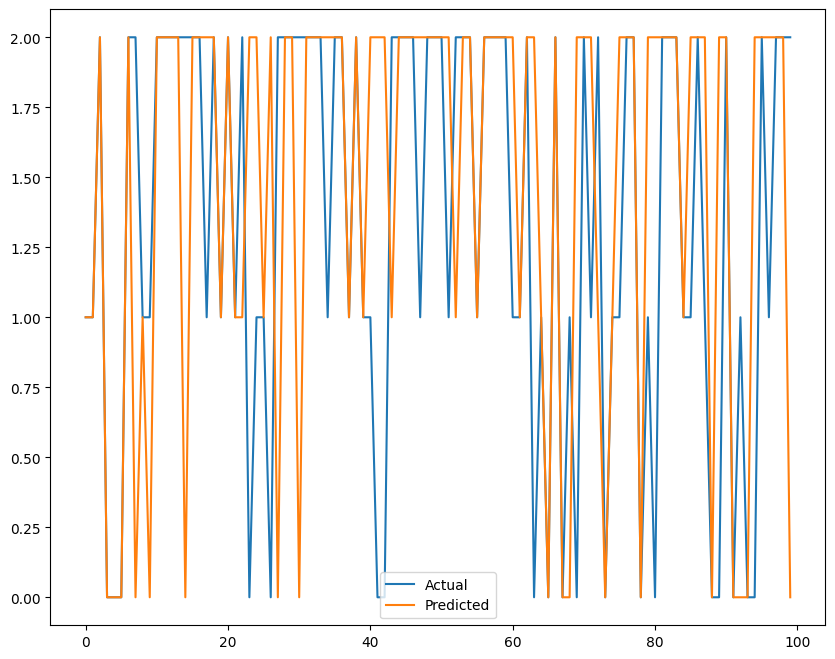

In [119]:
y_pred1 = lgr.predict(x_test)
dd = pd.DataFrame({"Y_test" : y_test , "y_pred1": y_pred1})
plt.figure(figsize=(10,8))
plt.plot(dd[:100])
plt.legend(["Actual" , "Predicted"])

# **KNN**

In [120]:
knn = knnClassifier(n_neighbors=5)

In [121]:
knn.fit(x_train , y_train)

KNeighborsClassifier()

In [122]:
knn_score = knn.score(x_train , y_train)

In [123]:
knn_score_t = knn.score(x_test , y_test)

In [124]:
knn_score_t

0.701911198314076

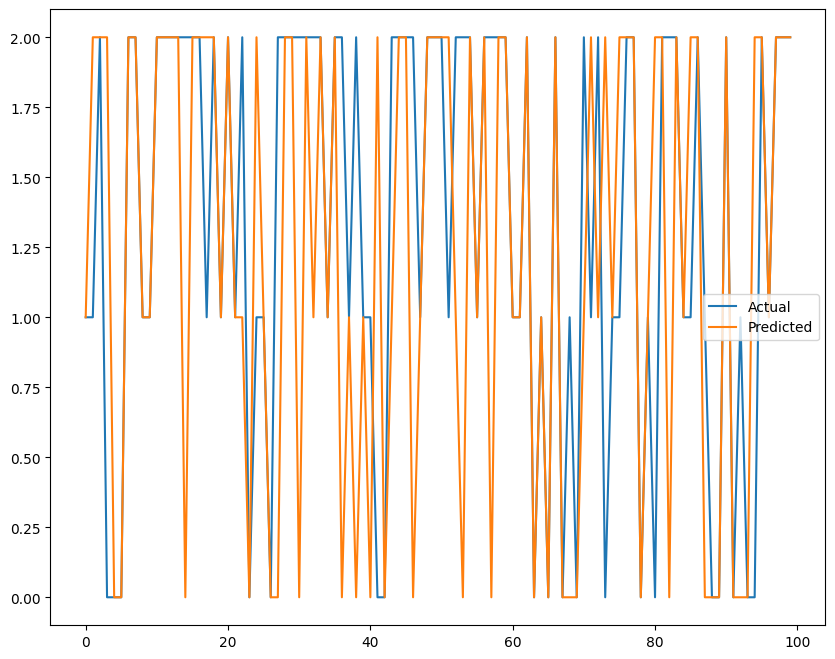

In [125]:
y_pred2 = knn.predict(x_test)
dd = pd.DataFrame({"Y_test" : y_test , "y_pred2": y_pred2})
plt.figure(figsize=(10,8))
plt.plot(dd[:100])
plt.legend(["Actual" , "Predicted"])

# **Decision Tree Classifier**

In [126]:
dt = dtClassifier(max_features=14, max_depth=8)

In [127]:
dt.fit(x_train , y_train)

DecisionTreeClassifier(max_depth=8, max_features=14)

In [128]:
dt_score = dt.score(x_train , y_train)

In [129]:
dt_score_t = dt.score(x_test , y_test)

In [130]:
dt_score_t

0.7221858876535135

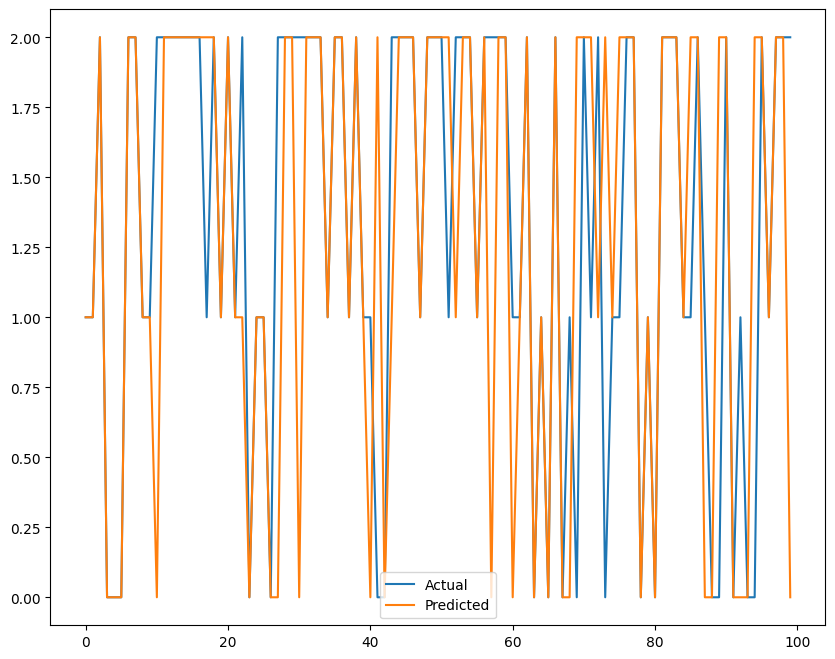

In [131]:
y_pred3 = dt.predict(x_test)
dd = pd.DataFrame({"Y_test" : y_test , "y_pred3": y_pred3})
plt.figure(figsize=(10,8))
plt.plot(dd[:100])
plt.legend(["Actual" , "Predicted"])

# **Random Forest Classifier**

In [132]:
rf = rfClassifier(max_features= 14, max_depth= 8)

In [133]:
rf.fit(x_train , y_train)

RandomForestClassifier(max_depth=8, max_features=14)

In [134]:
rf_score = rf.score(x_train , y_train)

In [135]:
rf_score_t = rf.score(x_test , y_test)

In [136]:
rf_score_t 

0.7302521619068382

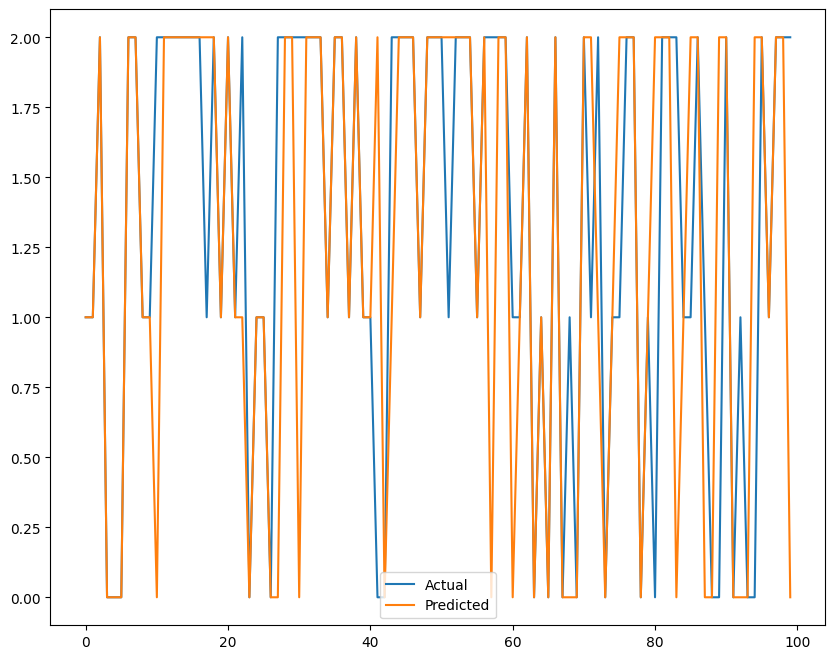

In [137]:
y_pred4 = rf.predict(x_test)
dd = pd.DataFrame({"Y_test" : y_test , "y_pred4": y_pred4})
plt.figure(figsize=(10,8))
plt.plot(dd[:100])
plt.legend(["Actual" , "Predicted"])

# **GBM**

In [138]:
gbm = gbClassifier(n_estimators=100, learning_rate=0.2, random_state=42, max_depth = 5)

In [139]:
gbm.fit(x_train , y_train)

GradientBoostingClassifier(learning_rate=0.2, max_depth=5, random_state=42)

In [140]:
gbm_score = gbm.score(x_train , y_train)


In [141]:
gbm_score_t = gbm.score(x_test , y_test)


In [142]:
gbm_score_t

0.7460213647264007

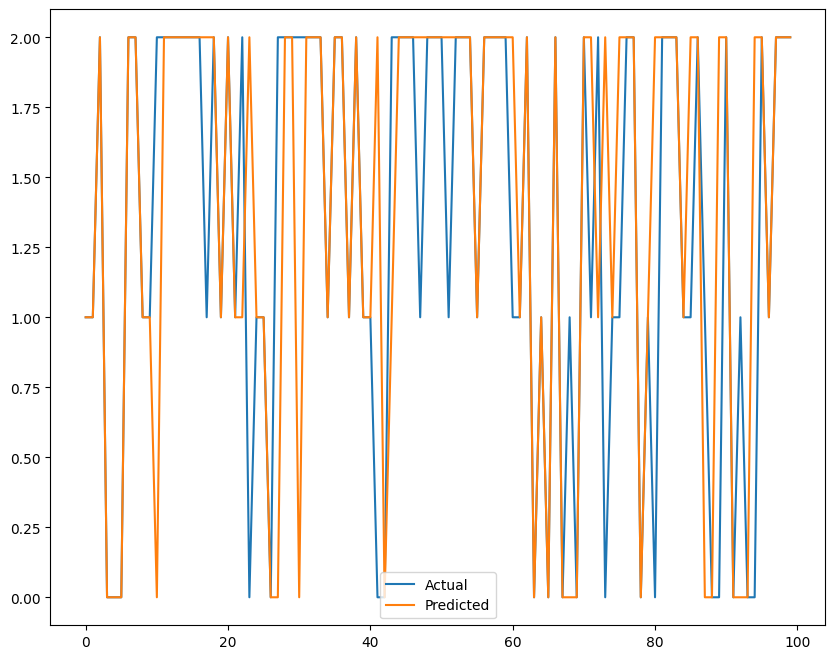

In [143]:
y_pred8 = gbm.predict(x_test)
dd = pd.DataFrame({"Y_test" : y_test , "y_pred8": y_pred8})
plt.figure(figsize=(10,8))
plt.plot(dd[:100])
plt.legend(["Actual" , "Predicted"])

# **Comparison**

In [145]:
models = ['logistic regression', 'knn', 'decision tree', 'random forest','gbm']
results = [[lgr_score, lgr_score_t],[knn_score, knn_score_t],[dt_score, dt_score_t],[rf_score, rf_score_t],[gbm_score, gbm_score_t]]
cols = ["Train Score", 'Test Score']
pd.DataFrame(data=results , index= models , columns= cols).sort_values(ascending= False , by = ['Train Score'])

,Train Score,Test Score
gbm,0.821172,0.746021
knn,0.802955,0.701911
random forest,0.752907,0.730252
decision tree,0.743217,0.722186
logistic regression,0.671923,0.665068
